In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from dim_reduction_utils import DimensionalityReduction, EvaluationMetrics
from sklearn.preprocessing import StandardScaler

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Seed for reproducibility
np.random.seed(42)

# %%
# Load the Isolet dataset
isolet = fetch_ucirepo(id=54)

# Extract features and target
X = isolet.data.features
y = isolet.data.targets.values.ravel()  # Flatten the target array

# Display metadata
print("Dataset Metadata:")
print(isolet.metadata)
print("\nVariable Information:")
print(isolet.variables)

Dataset Metadata:
{'uci_id': 54, 'name': 'ISOLET', 'repository_url': 'https://archive.ics.uci.edu/dataset/54/isolet', 'data_url': 'https://archive.ics.uci.edu/static/public/54/data.csv', 'abstract': ' Goal: Predict which letter-name was spoken--a simple classification task.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 7797, 'num_features': 617, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C51G69', 'creators': ['Ron Cole', 'Mark Fanty'], 'intro_paper': {'ID': 394, 'type': 'NATIVE', 'title': 'Spoken letter recognition', 'authors': 'Fanty, M., Cole, R.', 'venue': 'Advances in Neural Information Processing Systems 3', 'year': 1991, 'journal': None, 'DOI': None, 'URL': None, 'sha': None, 'corpus': None, 'arxiv': None, 'mag': Non

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f"\nDataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")



Dataset shape: (7797, 617)
Number of features: 617
Number of samples: 7797
Number of classes: 26


In [5]:
import matplotlib.cm as cm
letter_names = {i: chr(i+64) for i in range(1, 27)}  # Convert 1-26 to A-Z

# %%
# Function to plot density distributions (modified for many classes)
def plot_density_distribution(X_reduced, y, title, n_classes_to_show=5):
    plt.figure(figsize=(16, 7))
    
    # Randomly select n classes to display for clarity
    classes_to_show = np.random.choice(np.unique(y), size=n_classes_to_show, replace=False)
    classes_to_show.sort()  # Sort for consistent ordering
    
    # First component density
    plt.subplot(1, 2, 1)
    for i in classes_to_show:
        sns.kdeplot(X_reduced[y == i, 0], label=f'Letter {letter_names[i]}', fill=True, alpha=0.3)
    plt.title(f'{title} - Component 1 Density (Selected Letters)')
    plt.xlabel('Component 1')
    plt.ylabel('Density')
    plt.legend()
    
    # Second component density (if available)
    if X_reduced.shape[1] > 1:
        plt.subplot(1, 2, 2)
        for i in classes_to_show:
            sns.kdeplot(X_reduced[y == i, 1], label=f'Letter {letter_names[i]}', fill=True, alpha=0.3)
        plt.title(f'{title} - Component 2 Density (Selected Letters)')
        plt.xlabel('Component 2')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()


In [6]:
dr = DimensionalityReduction(n_components=2, random_state=42)
metrics = EvaluationMetrics(k=5)

In [7]:
def visualize_letters(X_reduced, y, title):
    plt.figure(figsize=(12, 10))
    
    # Create a scatter plot
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
                 c=y, cmap='tab20', alpha=0.7, s=30)
    
    # Add a colorbar with letter labels
    cbar = plt.colorbar(scatter, ticks=np.arange(1, 27))
    cbar.ax.set_yticklabels([chr(i+64) for i in range(1, 27)])  # A to Z labels
    
    # Add some random letter annotations for clarity
    np.random.seed(42)
    indices = np.random.choice(len(y), size=30, replace=False)
    for idx in indices:
        letter = chr(int(y[idx])+64)  # Convert to int first
        plt.annotate(letter, (X_reduced[idx, 0], X_reduced[idx, 1]),
                    fontsize=12, ha='center', va='center')
    
    plt.title(title, fontsize=14)
    plt.xlabel('Component 1', fontsize=12)
    plt.ylabel('Component 2', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [10]:
# Extract features and target
X = isolet.data.features
y = isolet.data.targets.values.ravel()  # Flatten the target array

# Make sure y contains integer values
y = y.astype(int)

# If labels are 0-25 instead of 1-26, adjust them
if y.min() == 0:
    y = y + 1  # Adjust to 1-26 range for A-Z

PCA Metrics:
Trustworthiness: 0.8438
Continuity: 0.9563
KNN Accuracy: 0.2551
Silhouette Score: -0.0946


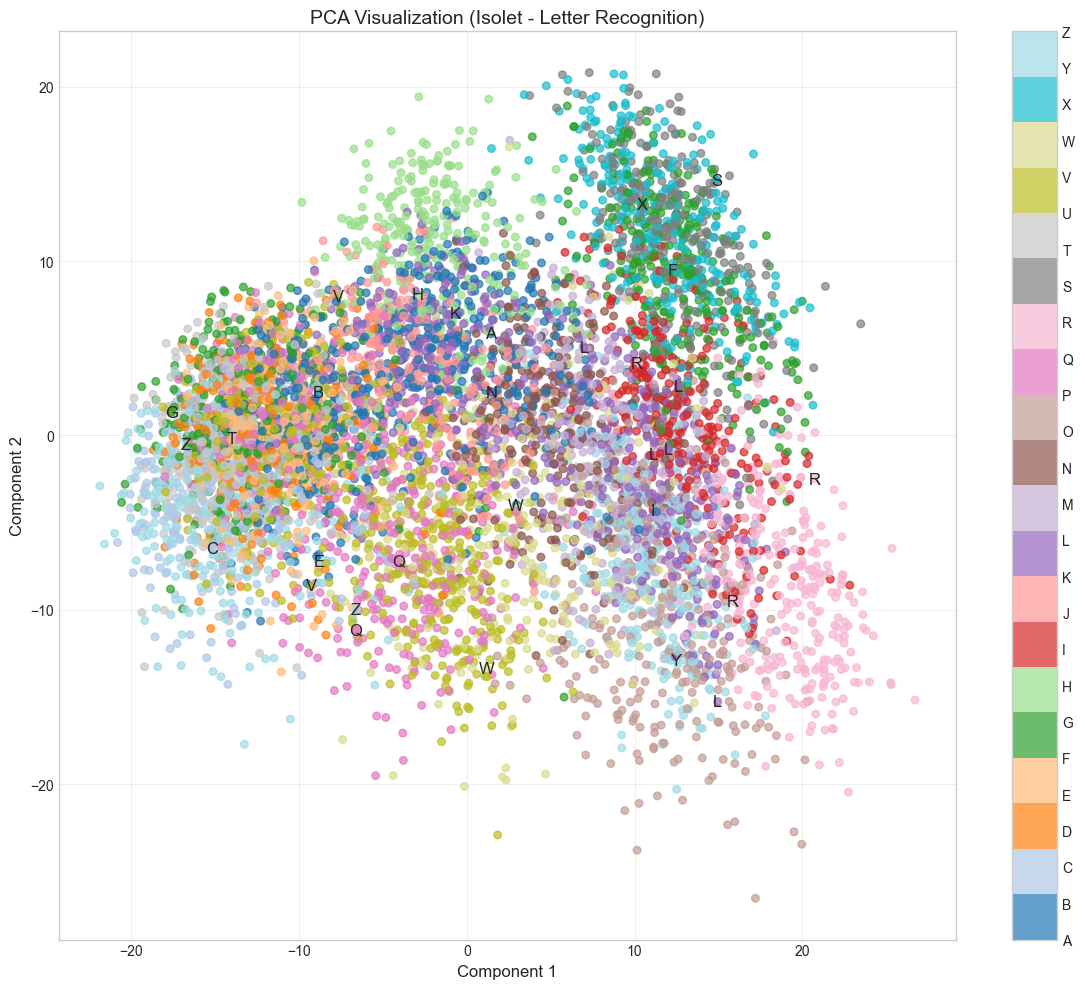

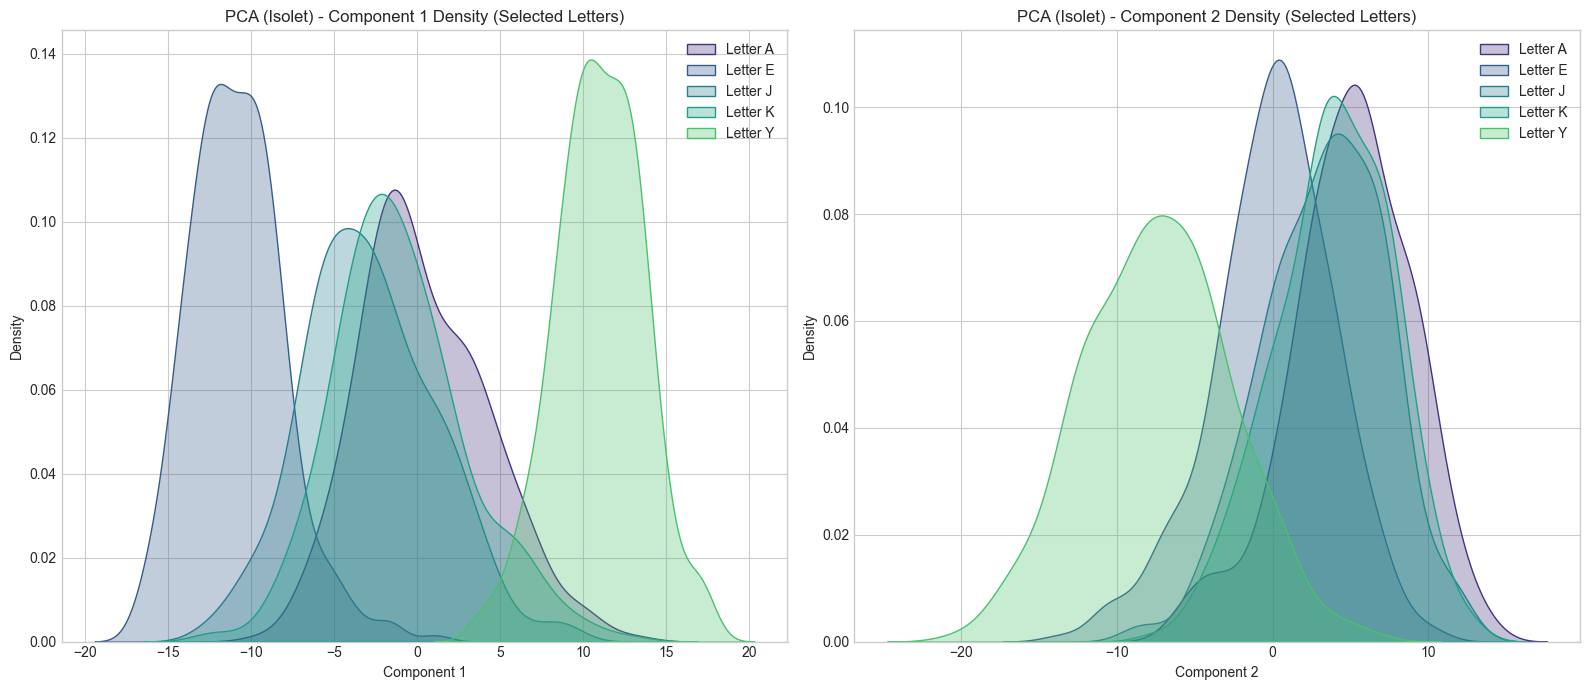

In [11]:
X_pca = dr.pca(X)

# Evaluate PCA
trust_pca = metrics.trustworthiness(X, X_pca)
cont_pca = metrics.continuity(X, X_pca)
knn_acc_pca = metrics.knn_accuracy(X_pca, y)
sil_score_pca = metrics.silhouette_score(X_pca, y)

print(f"PCA Metrics:")
print(f"Trustworthiness: {trust_pca:.4f}")
print(f"Continuity: {cont_pca:.4f}")
print(f"KNN Accuracy: {knn_acc_pca:.4f}")
print(f"Silhouette Score: {sil_score_pca:.4f}")

# Visualize PCA results using the custom letter visualization
visualize_letters(X_pca, y, "PCA Visualization (Isolet - Letter Recognition)")

# Plot density distribution for selected letters
plot_density_distribution(X_pca, y, "PCA (Isolet)", n_classes_to_show=5)

LDA Metrics:
Trustworthiness: 0.8357
Continuity: 0.9398
KNN Accuracy: 0.5122
Silhouette Score: 0.0528


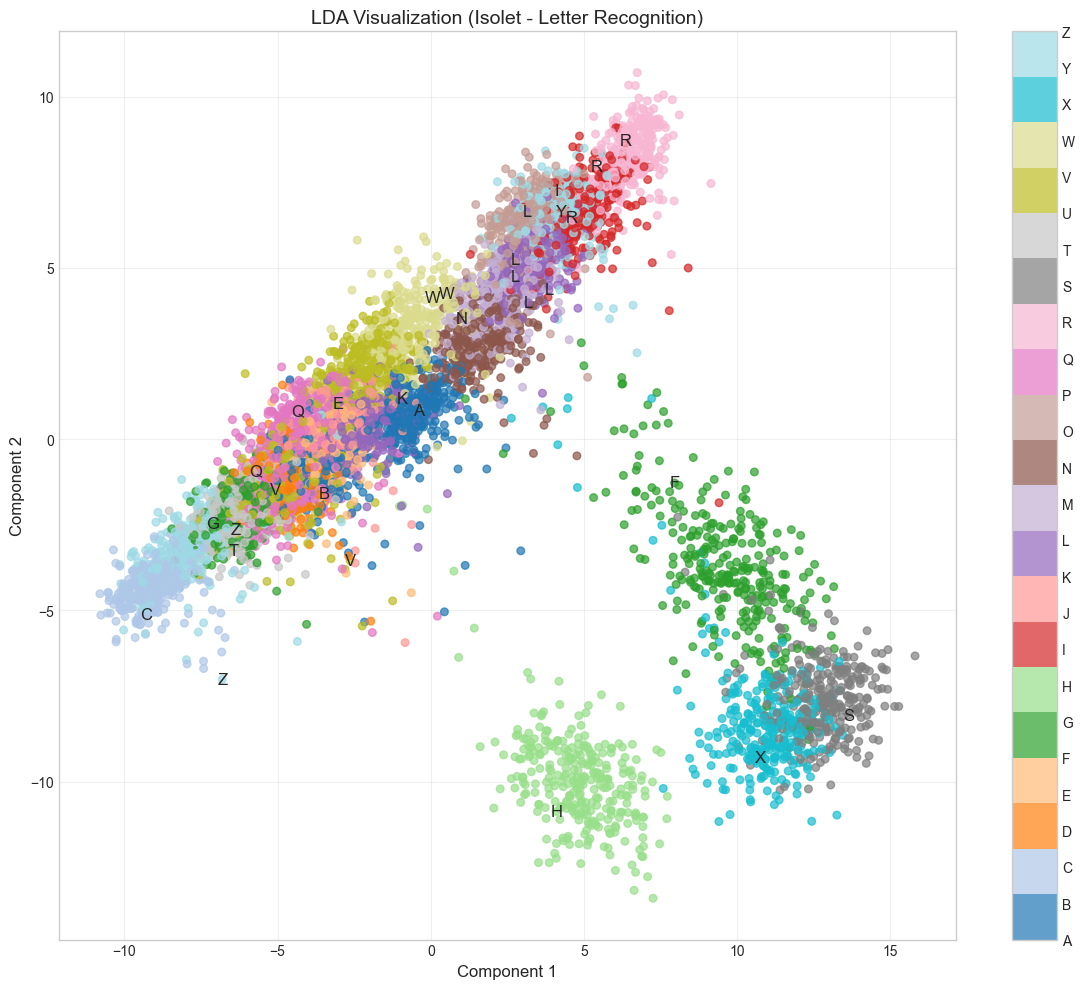

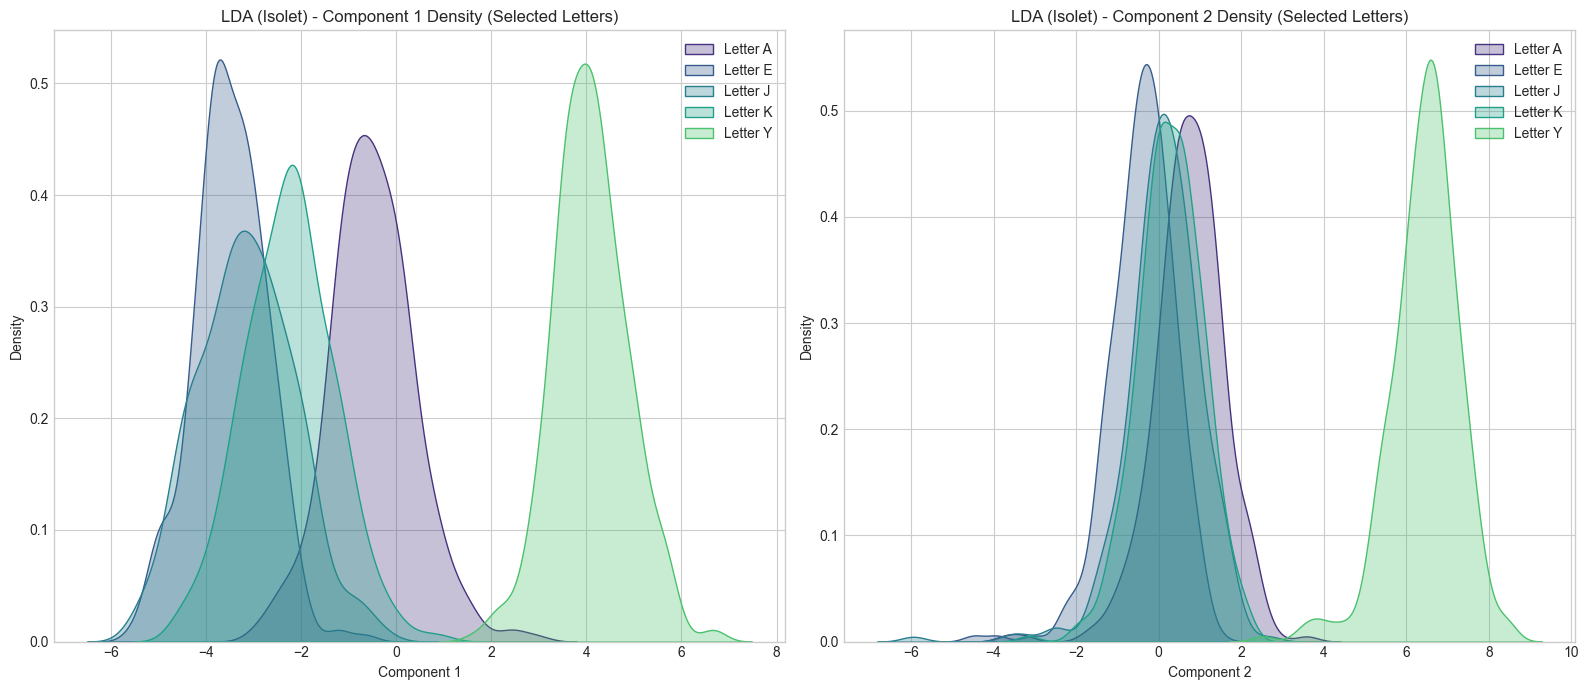

In [12]:
dr_lda = DimensionalityReduction(n_components=2, random_state=42)
X_lda = dr_lda.lda(X, y)

# Evaluate LDA
trust_lda = metrics.trustworthiness(X, X_lda)
cont_lda = metrics.continuity(X, X_lda)
knn_acc_lda = metrics.knn_accuracy(X_lda, y)
sil_score_lda = metrics.silhouette_score(X_lda, y)

print(f"LDA Metrics:")
print(f"Trustworthiness: {trust_lda:.4f}")
print(f"Continuity: {cont_lda:.4f}")
print(f"KNN Accuracy: {knn_acc_lda:.4f}")
print(f"Silhouette Score: {sil_score_lda:.4f}")

# Visualize LDA results
visualize_letters(X_lda, y, "LDA Visualization (Isolet - Letter Recognition)")

# Plot density distribution
plot_density_distribution(X_lda, y, "LDA (Isolet)", n_classes_to_show=5)

c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\LapTop\AppData\Local\Programs\Python\Python310\lib

t-SNE Metrics:
Trustworthiness: 0.9945
Continuity: 0.9887
KNN Accuracy: 0.8186
Silhouette Score: 0.1817


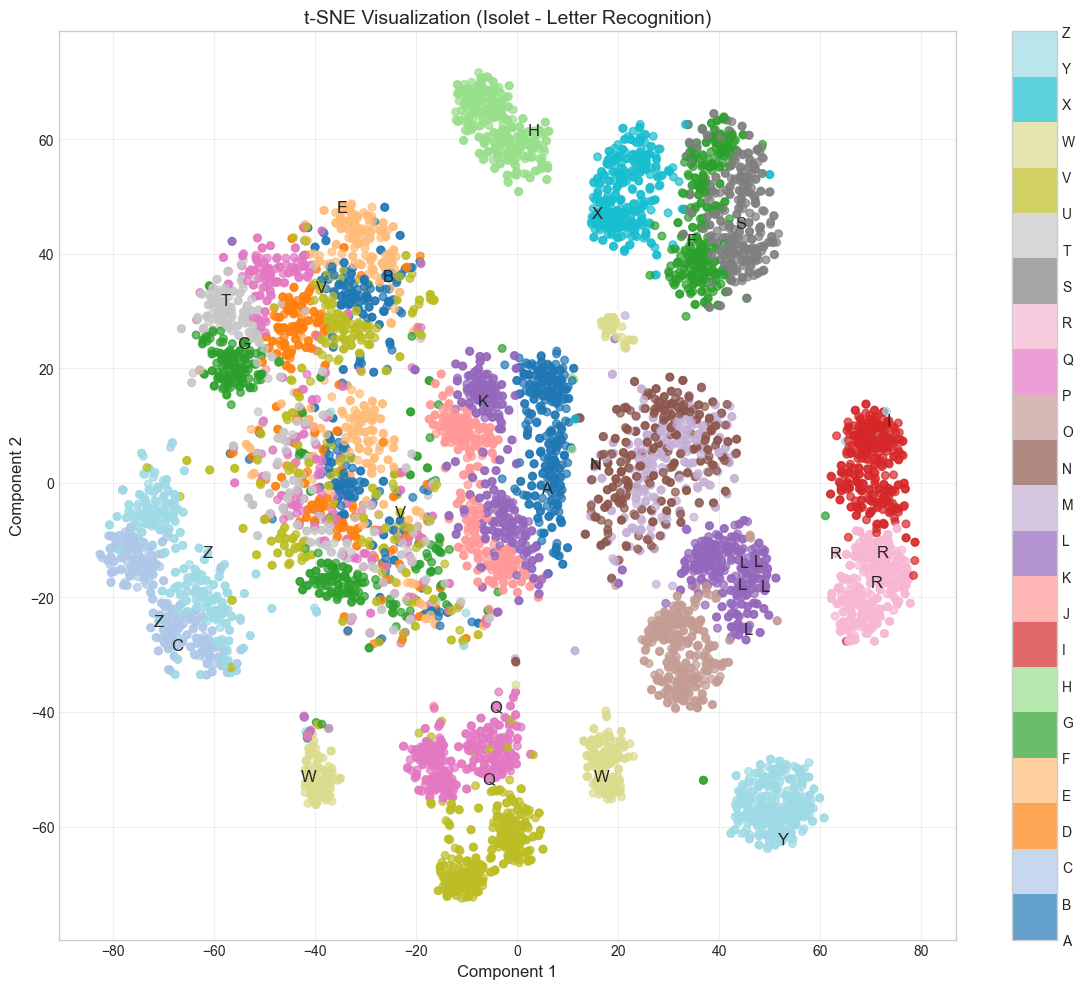

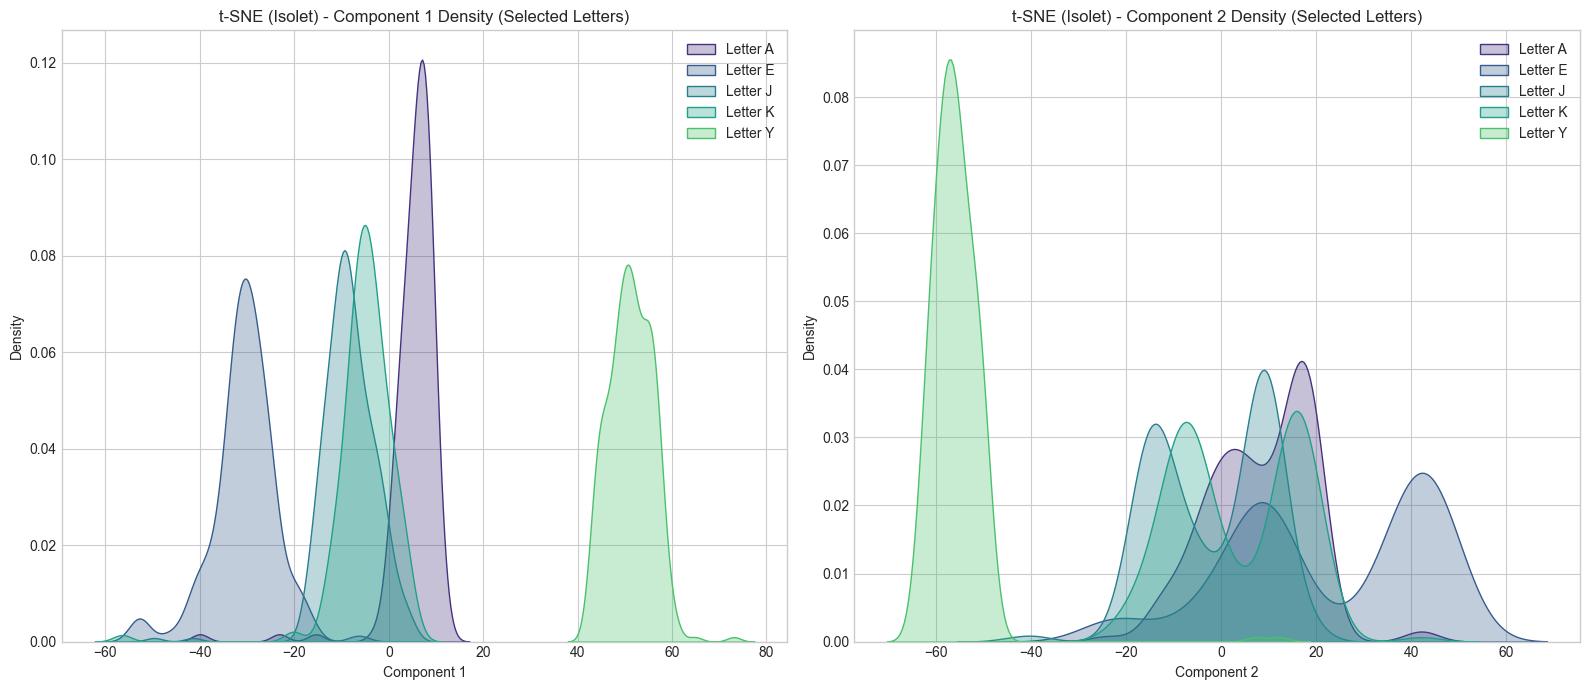

In [13]:
X_tsne = dr.tsne(X, perplexity=40)

# Evaluate t-SNE
trust_tsne = metrics.trustworthiness(X, X_tsne)
cont_tsne = metrics.continuity(X, X_tsne)
knn_acc_tsne = metrics.knn_accuracy(X_tsne, y)
sil_score_tsne = metrics.silhouette_score(X_tsne, y)

print(f"t-SNE Metrics:")
print(f"Trustworthiness: {trust_tsne:.4f}")
print(f"Continuity: {cont_tsne:.4f}")
print(f"KNN Accuracy: {knn_acc_tsne:.4f}")
print(f"Silhouette Score: {sil_score_tsne:.4f}")

# Visualize t-SNE results
visualize_letters(X_tsne, y, "t-SNE Visualization (Isolet - Letter Recognition)")

# Plot density distribution
plot_density_distribution(X_tsne, y, "t-SNE (Isolet)", n_classes_to_show=5)

In [15]:
# Convert to numpy array if it's a DataFrame
if isinstance(X, pd.DataFrame):
    X = X.values

# Same for y
if isinstance(y, pd.Series):
    y = y.values

# Now subset the data
sample_size = 1000  # Using a subset of samples
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_mds_subset = X[indices]
y_mds_subset = y[indices]

X_mds = dr.mds(X_mds_subset)

MDS Metrics (on 1000-sample subset):
Trustworthiness: 0.8585
Continuity: 0.8843
KNN Accuracy: 0.3350
Silhouette Score: -0.1143


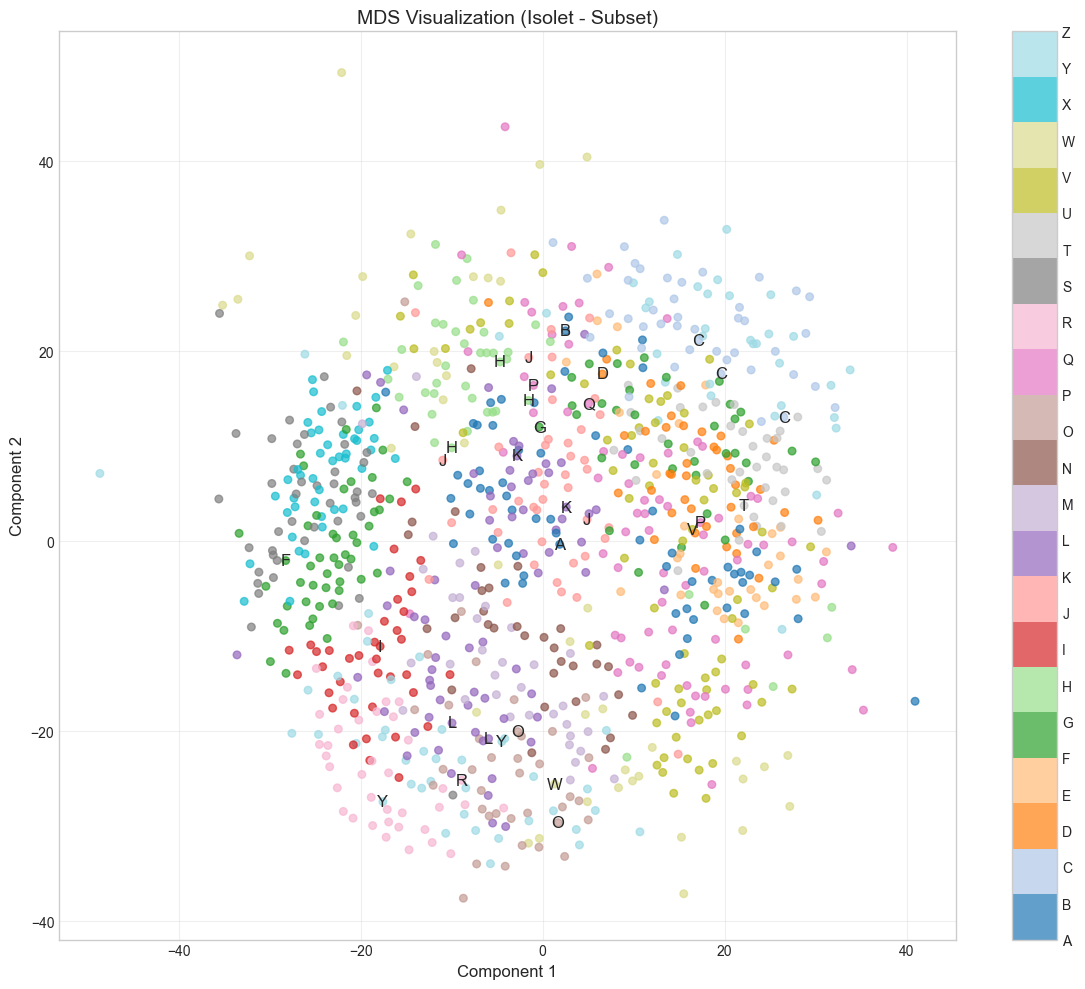

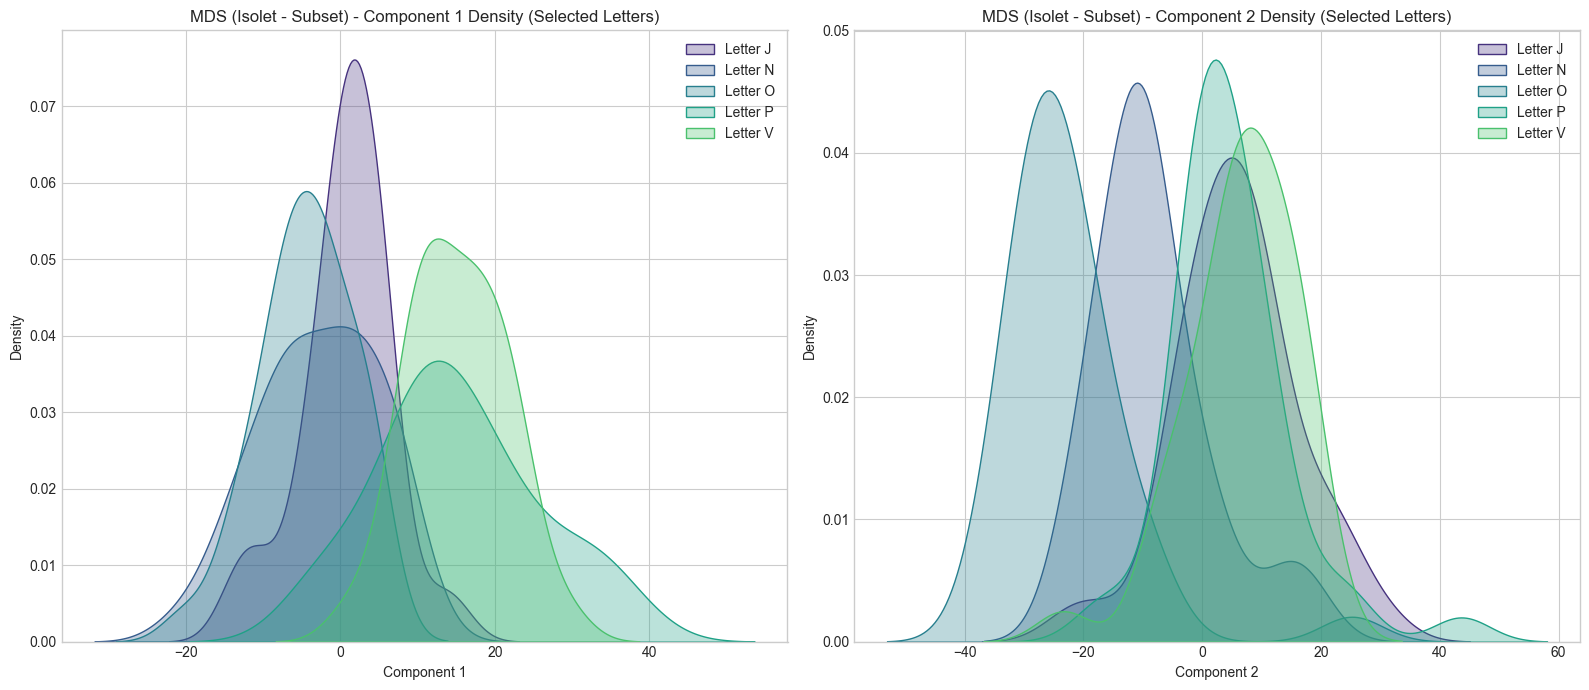

In [16]:


# Evaluate MDS on the subset
trust_mds = metrics.trustworthiness(X_mds_subset, X_mds)
cont_mds = metrics.continuity(X_mds_subset, X_mds)
knn_acc_mds = metrics.knn_accuracy(X_mds, y_mds_subset)
sil_score_mds = metrics.silhouette_score(X_mds, y_mds_subset)

print(f"MDS Metrics (on {sample_size}-sample subset):")
print(f"Trustworthiness: {trust_mds:.4f}")
print(f"Continuity: {cont_mds:.4f}")
print(f"KNN Accuracy: {knn_acc_mds:.4f}")
print(f"Silhouette Score: {sil_score_mds:.4f}")

# Visualize MDS results
visualize_letters(X_mds, y_mds_subset, "MDS Visualization (Isolet - Subset)")

# Plot density distribution
plot_density_distribution(X_mds, y_mds_subset, "MDS (Isolet - Subset)", n_classes_to_show=5)

ICA Metrics:
Trustworthiness: 0.8442
Continuity: 0.9506
KNN Accuracy: 0.2628
Silhouette Score: -0.0999


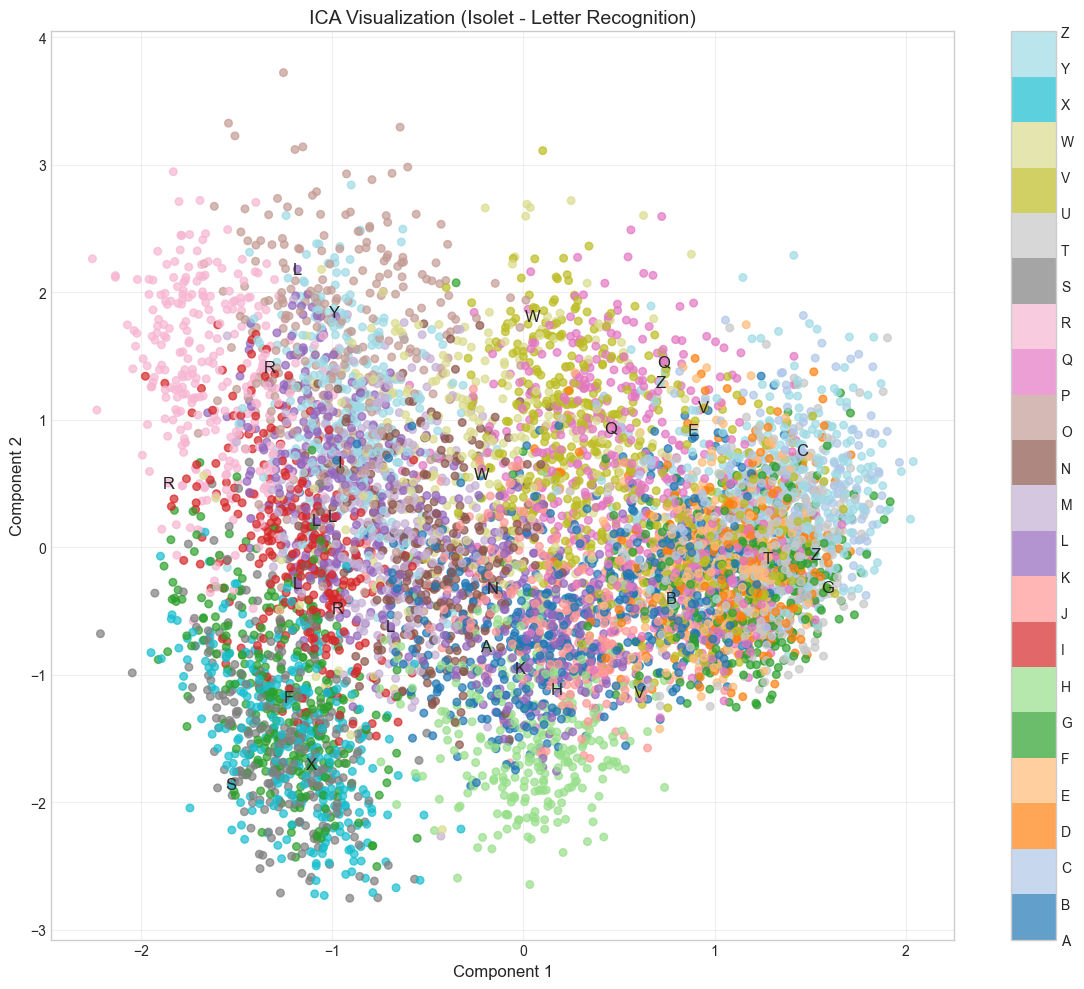

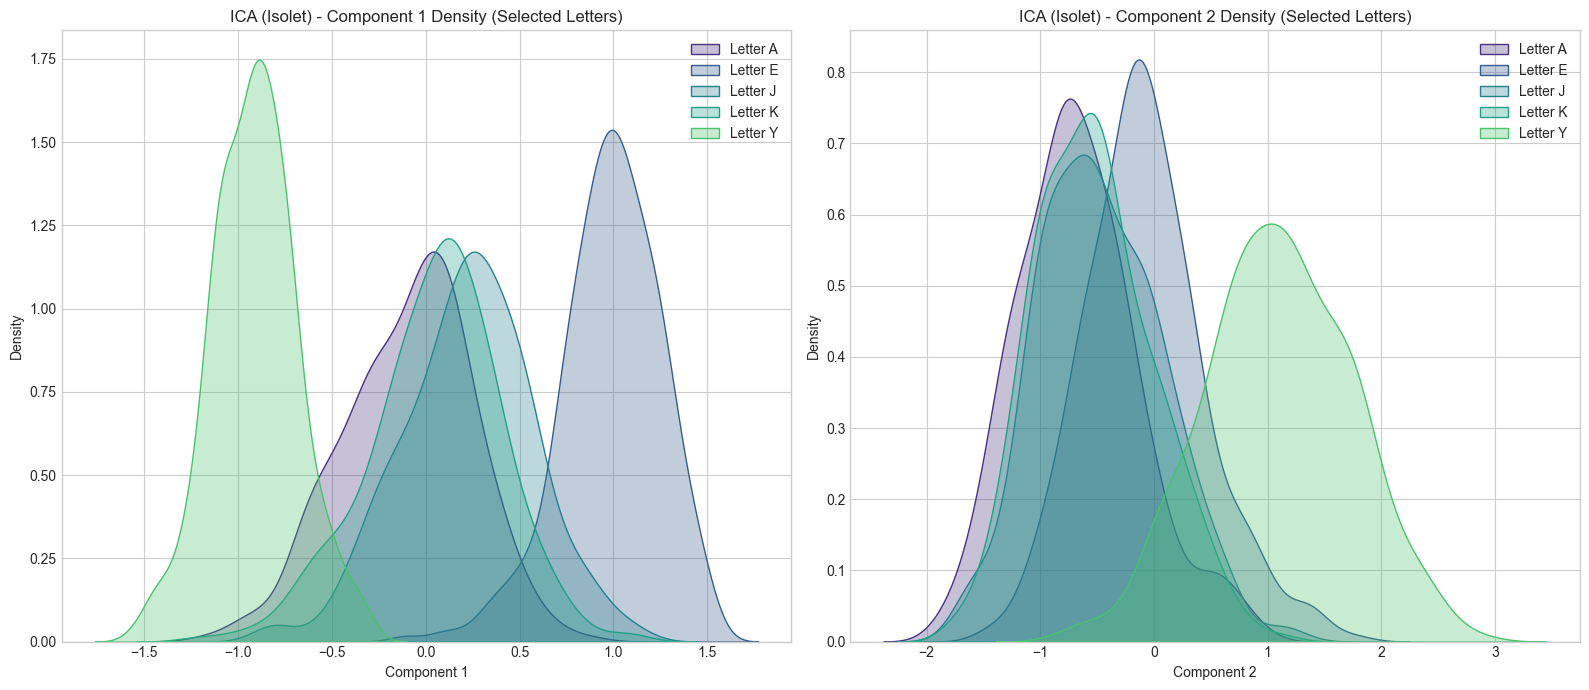

In [17]:
X_ica = dr.ica(X)

# Evaluate ICA
trust_ica = metrics.trustworthiness(X, X_ica)
cont_ica = metrics.continuity(X, X_ica)
knn_acc_ica = metrics.knn_accuracy(X_ica, y)
sil_score_ica = metrics.silhouette_score(X_ica, y)

print(f"ICA Metrics:")
print(f"Trustworthiness: {trust_ica:.4f}")
print(f"Continuity: {cont_ica:.4f}")
print(f"KNN Accuracy: {knn_acc_ica:.4f}")
print(f"Silhouette Score: {sil_score_ica:.4f}")

# Visualize ICA results
visualize_letters(X_ica, y, "ICA Visualization (Isolet - Letter Recognition)")

# Plot density distribution
plot_density_distribution(X_ica, y, "ICA (Isolet)", n_classes_to_show=5)


Isomap Metrics (on 1000-sample subset):
Trustworthiness: 0.8895
Continuity: 0.9506
KNN Accuracy: 0.4400
Silhouette Score: -0.0357


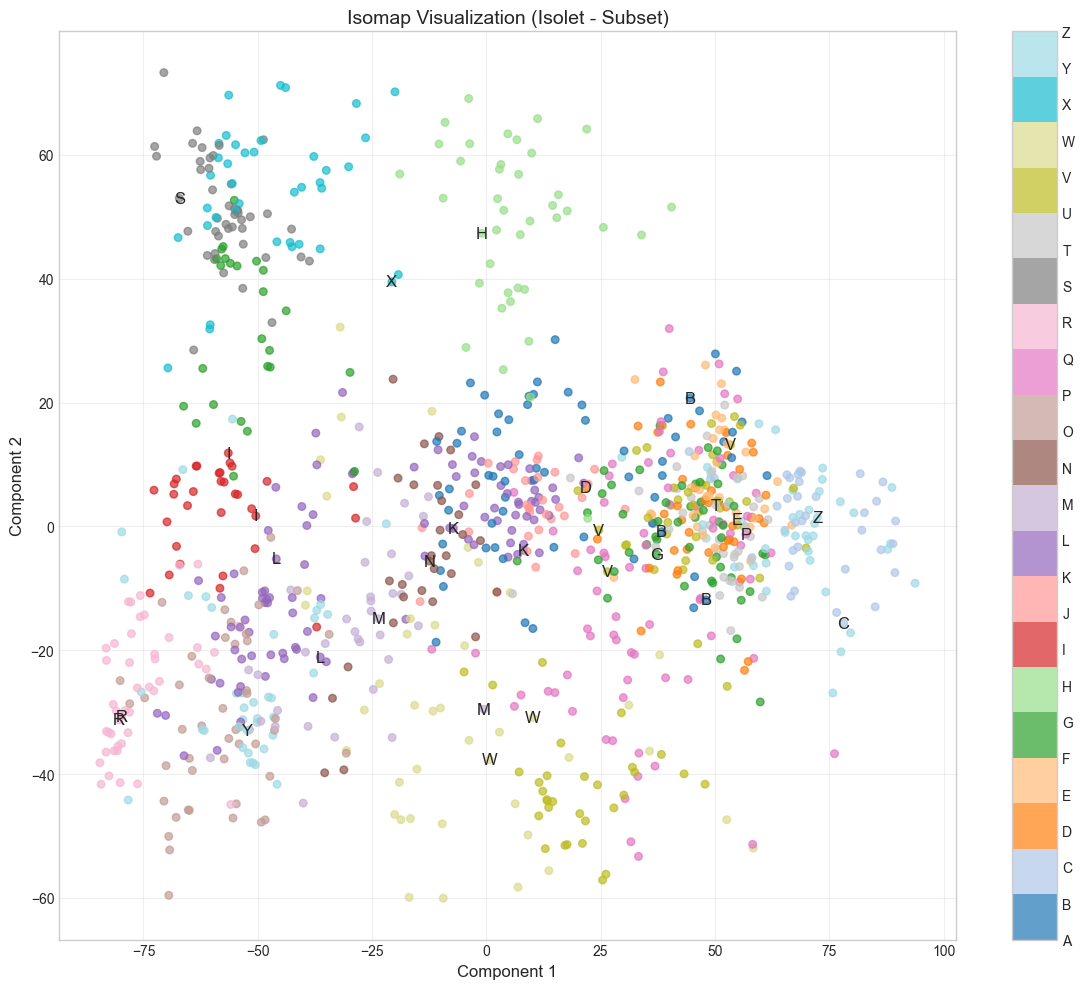

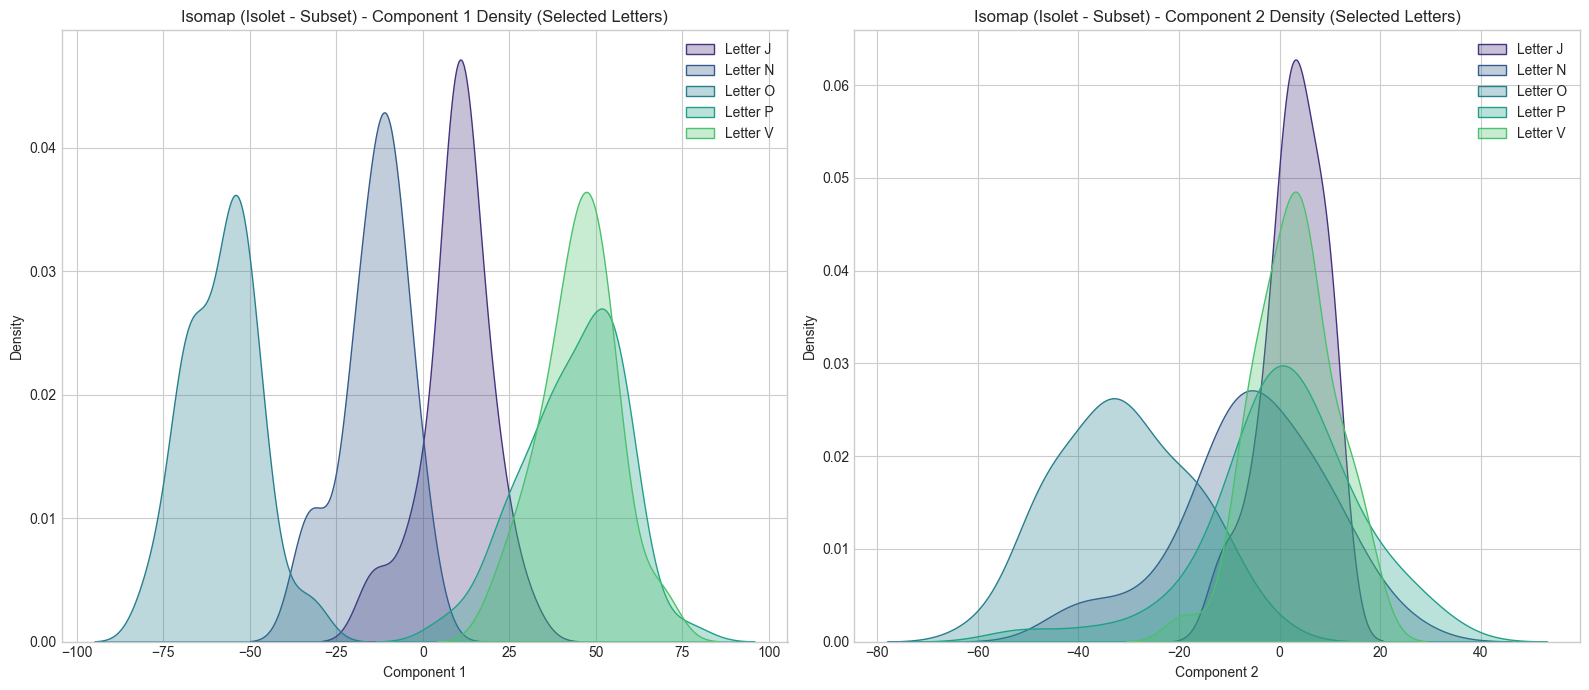

In [24]:
sample_size = 1000  # Using a subset of samples
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_isomap_subset = X[indices]
y_isomap_subset = y[indices]

X_isomap = dr.isomap(X_isomap_subset, n_neighbors=10)

# Evaluate Isomap on the subset
trust_isomap = metrics.trustworthiness(X_isomap_subset, X_isomap)
cont_isomap = metrics.continuity(X_isomap_subset, X_isomap)
knn_acc_isomap = metrics.knn_accuracy(X_isomap, y_isomap_subset)
sil_score_isomap = metrics.silhouette_score(X_isomap, y_isomap_subset)

print(f"Isomap Metrics (on {sample_size}-sample subset):")
print(f"Trustworthiness: {trust_isomap:.4f}")
print(f"Continuity: {cont_isomap:.4f}")
print(f"KNN Accuracy: {knn_acc_isomap:.4f}")
print(f"Silhouette Score: {sil_score_isomap:.4f}")

# Visualize Isomap results
visualize_letters(X_isomap, y_isomap_subset, "Isomap Visualization (Isolet - Subset)")

# Plot density distribution
plot_density_distribution(X_isomap, y_isomap_subset, "Isomap (Isolet - Subset)", n_classes_to_show=5)

SOM Metrics:
Trustworthiness: 0.9498
Continuity: 0.8904
KNN Accuracy: 0.6071
Silhouette Score: -0.0622


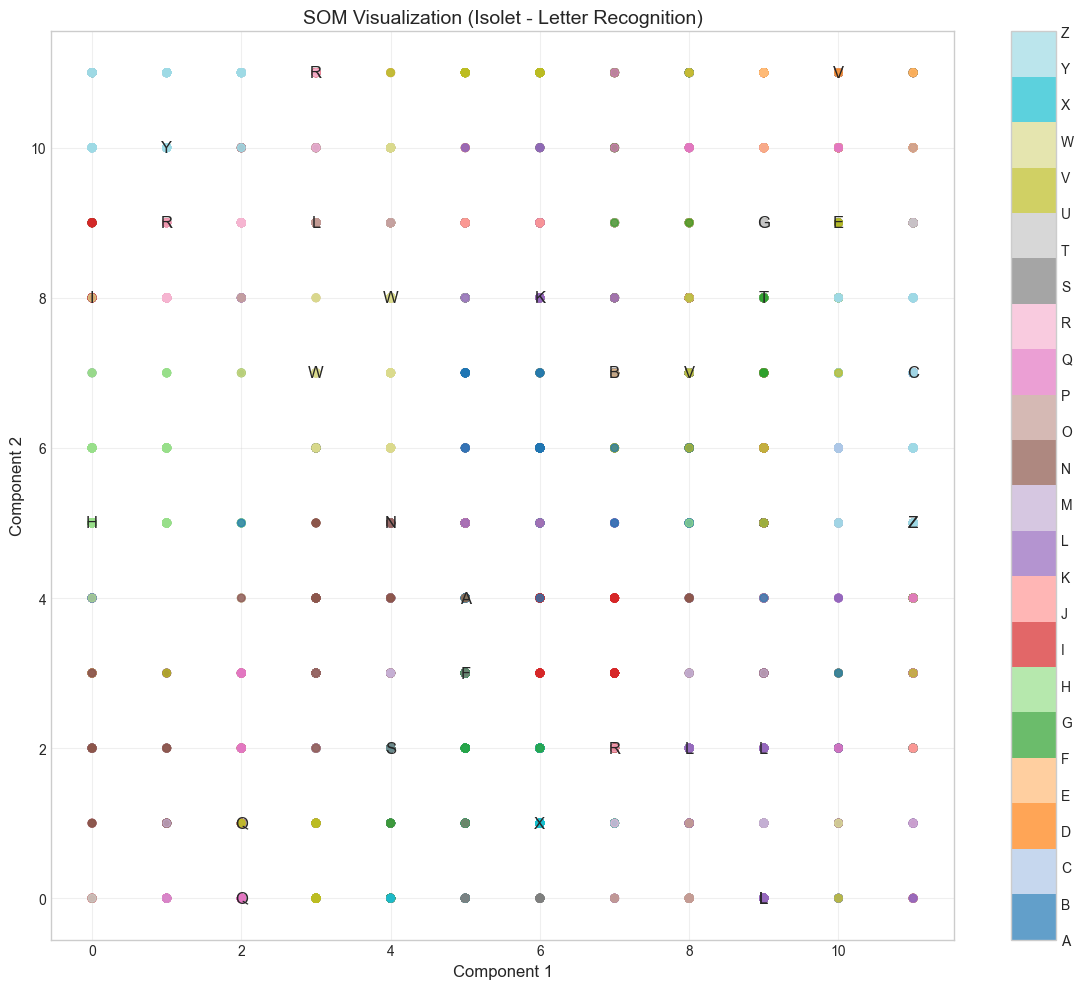

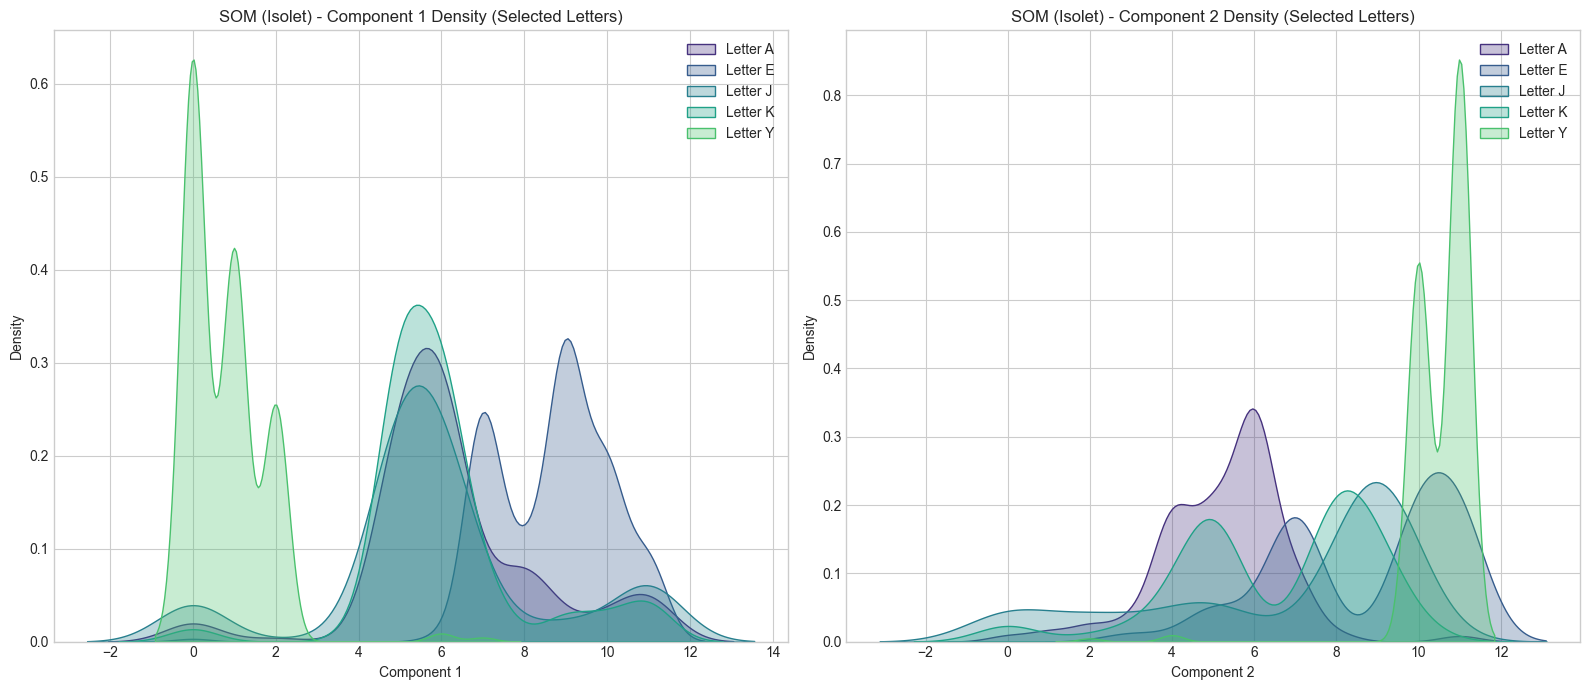

In [18]:
X_som = dr.som(X, grid_size=(12, 12))

# Evaluate SOM
trust_som = metrics.trustworthiness(X, X_som)
cont_som = metrics.continuity(X, X_som)
knn_acc_som = metrics.knn_accuracy(X_som, y)
sil_score_som = metrics.silhouette_score(X_som, y)

print(f"SOM Metrics:")
print(f"Trustworthiness: {trust_som:.4f}")
print(f"Continuity: {cont_som:.4f}")
print(f"KNN Accuracy: {knn_acc_som:.4f}")
print(f"Silhouette Score: {sil_score_som:.4f}")

# Visualize SOM results
visualize_letters(X_som, y, "SOM Visualization (Isolet - Letter Recognition)")

# Plot density distribution
plot_density_distribution(X_som, y, "SOM (Isolet)", n_classes_to_show=5)


GA-PCA Metrics (on 1000-sample subset):
Trustworthiness: 0.8474
Continuity: 0.9341
KNN Accuracy: 0.2850
Silhouette Score: -0.1159


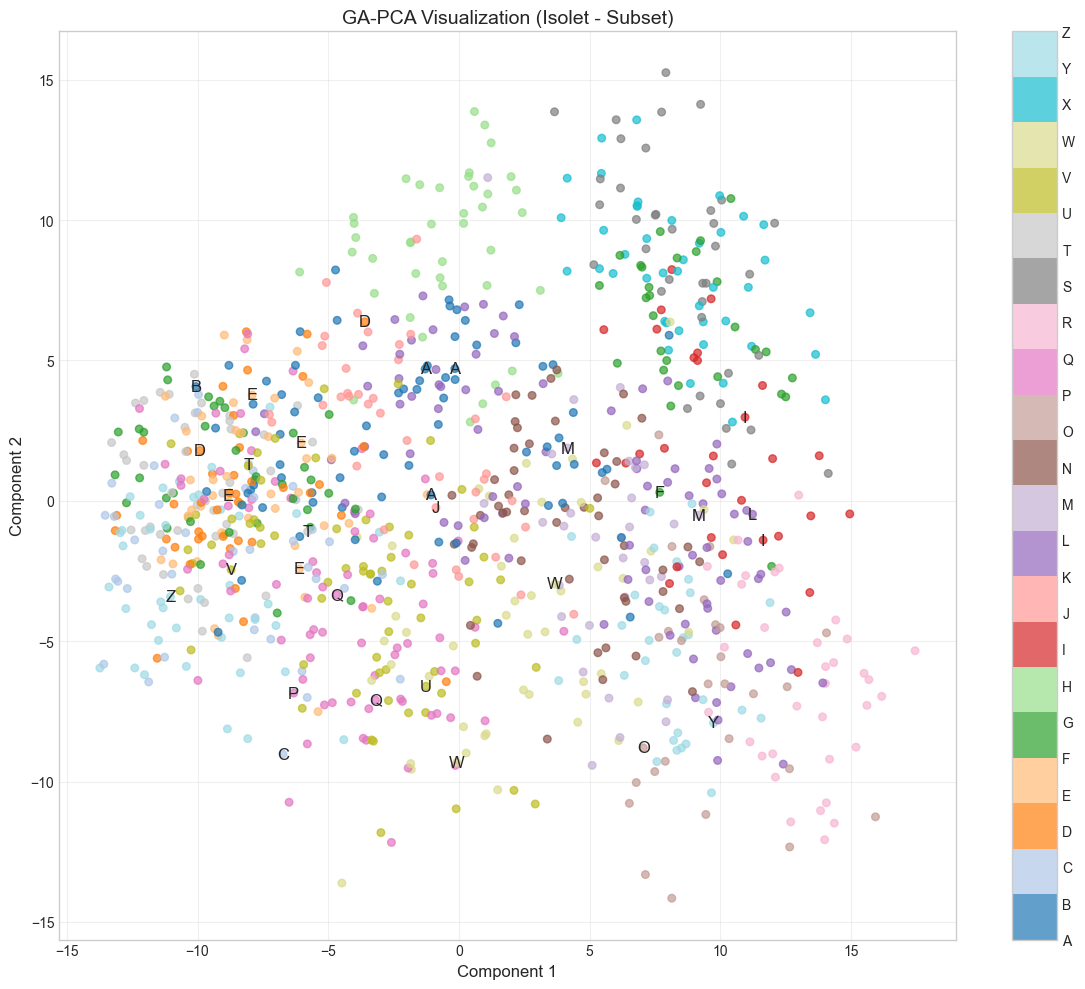

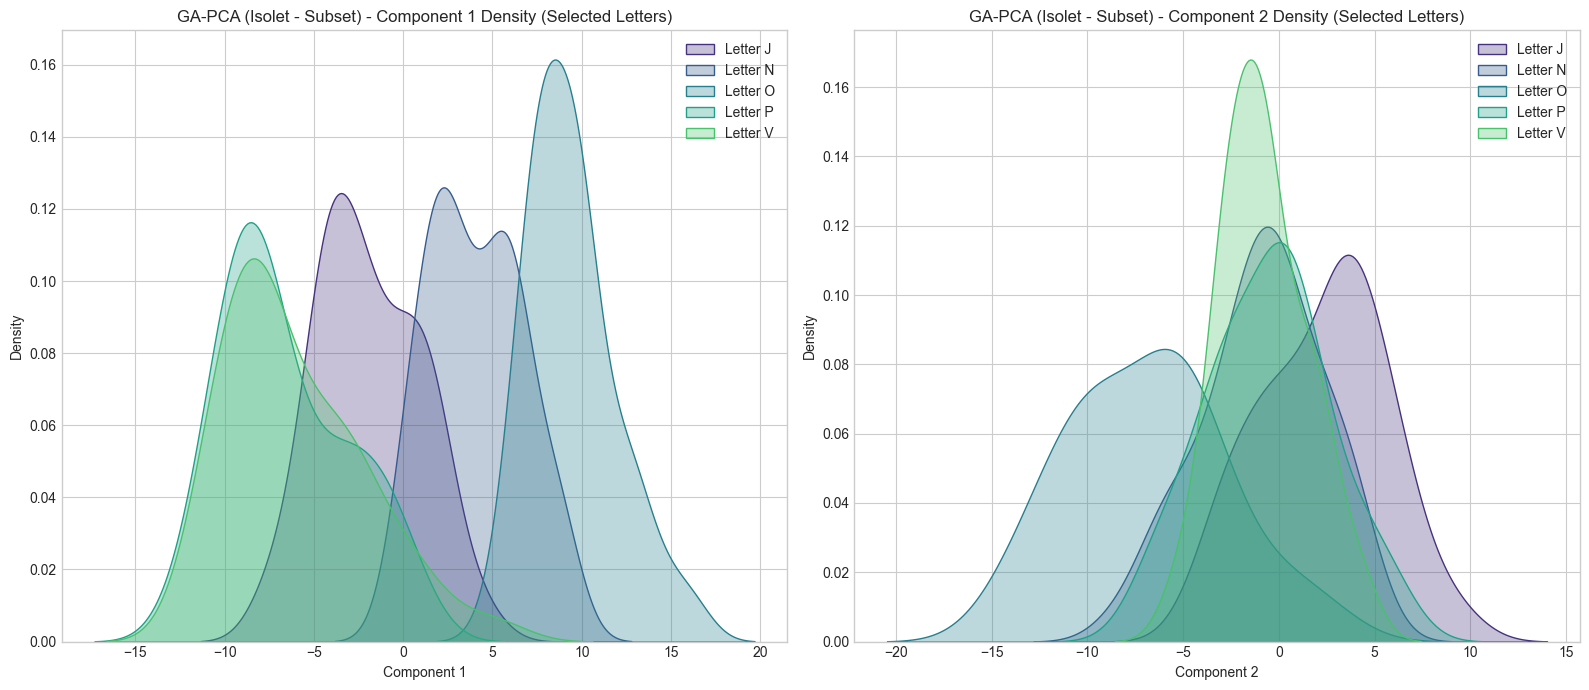

In [19]:
sample_size = 1000  # Using a subset of samples
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_ga_subset = X[indices]
y_ga_subset = y[indices]

X_ga_pca = dr.ga_pca(X_ga_subset, y_ga_subset, population_size=15, generations=15, mutation_rate=0.1)

# Evaluate GA-PCA on the subset
trust_ga_pca = metrics.trustworthiness(X_ga_subset, X_ga_pca)
cont_ga_pca = metrics.continuity(X_ga_subset, X_ga_pca)
knn_acc_ga_pca = metrics.knn_accuracy(X_ga_pca, y_ga_subset)
sil_score_ga_pca = metrics.silhouette_score(X_ga_pca, y_ga_subset)

print(f"GA-PCA Metrics (on {sample_size}-sample subset):")
print(f"Trustworthiness: {trust_ga_pca:.4f}")
print(f"Continuity: {cont_ga_pca:.4f}")
print(f"KNN Accuracy: {knn_acc_ga_pca:.4f}")
print(f"Silhouette Score: {sil_score_ga_pca:.4f}")

# Visualize GA-PCA results
visualize_letters(X_ga_pca, y_ga_subset, "GA-PCA Visualization (Isolet - Subset)")

# Plot density distribution
plot_density_distribution(X_ga_pca, y_ga_subset, "GA-PCA (Isolet - Subset)", n_classes_to_show=5)

ABC Metrics (on 1000-sample subset):
Trustworthiness: 0.7159
Continuity: 0.8213
KNN Accuracy: 0.1850
Silhouette Score: -0.1883


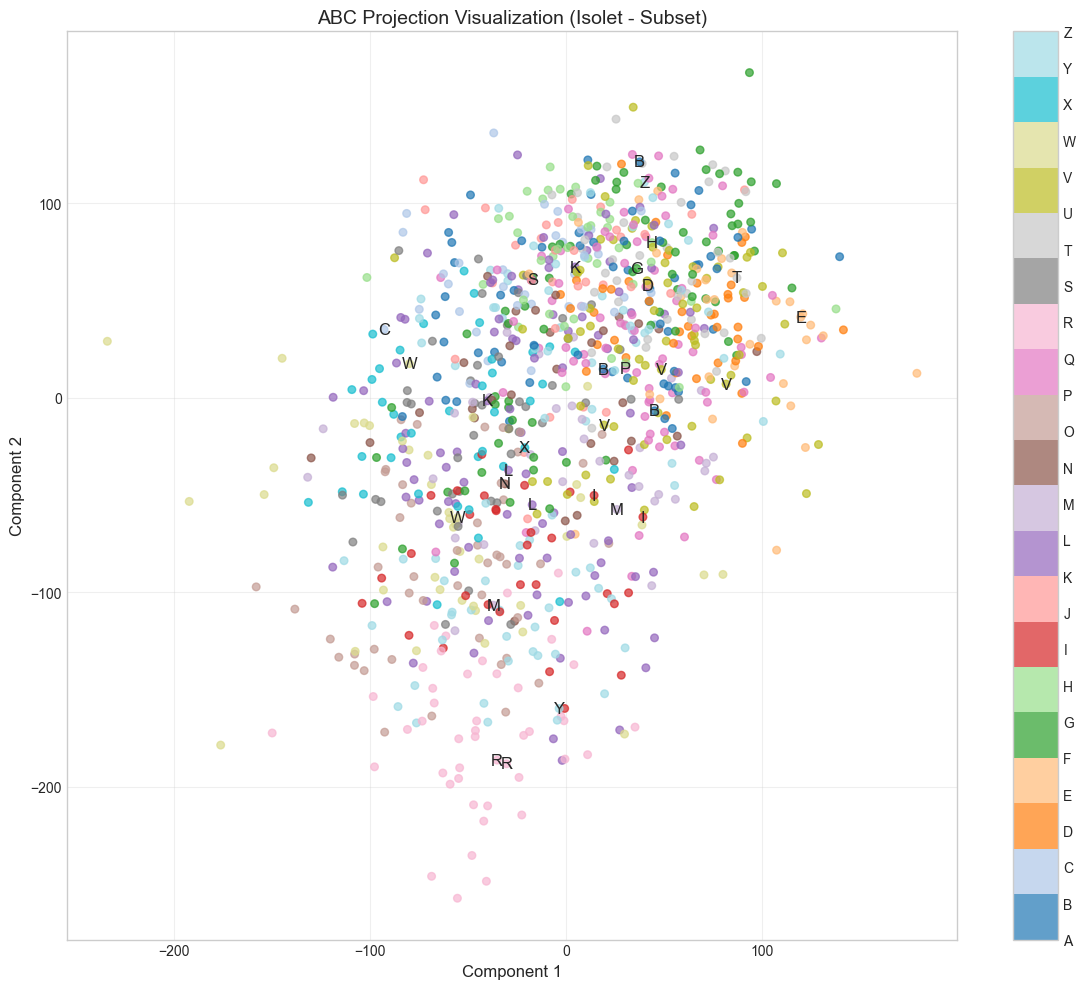

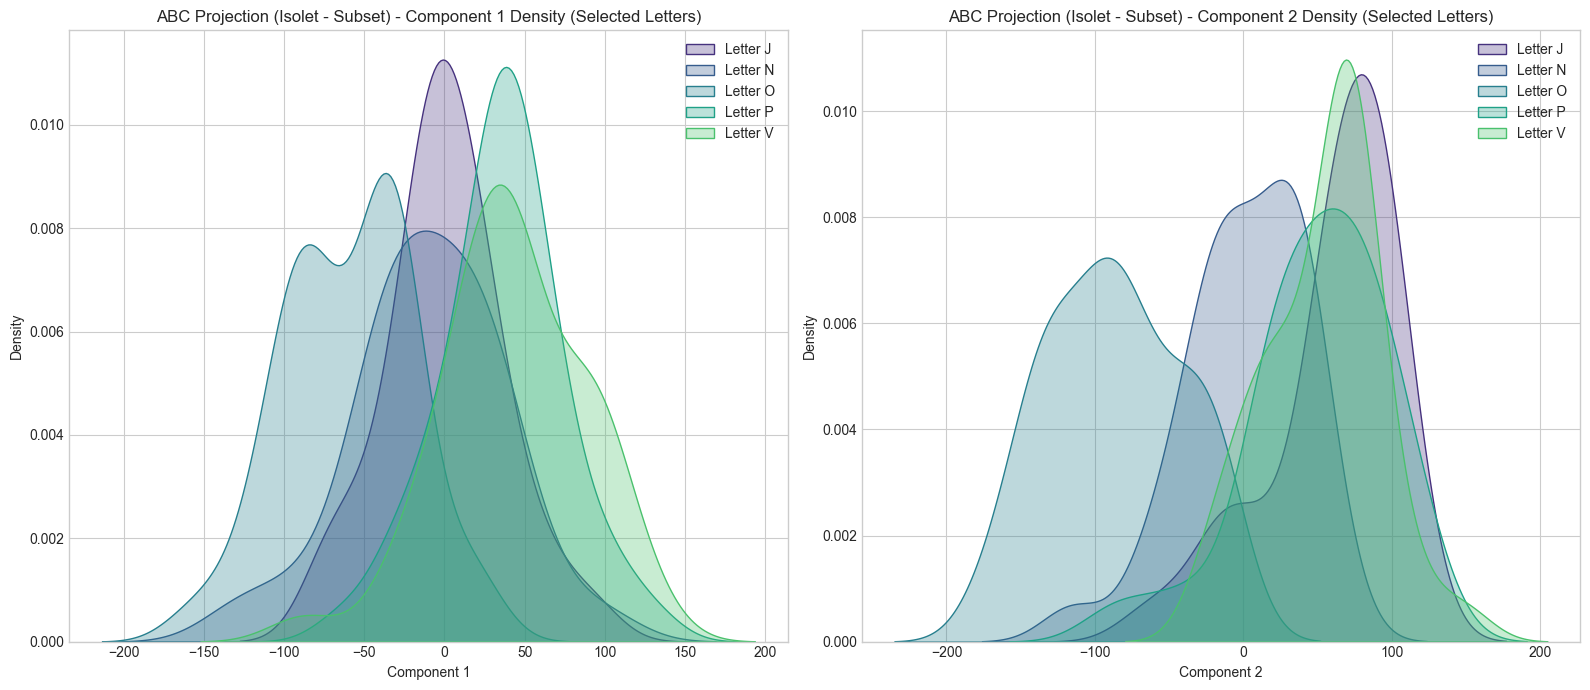

In [20]:
sample_size = 1000  # Using a subset of samples
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_abc_subset = X[indices]
y_abc_subset = y[indices]

X_abc = dr.abc_projection(X_abc_subset, y_abc_subset, n_bees=15, n_iterations=15, limit=3)

# Evaluate ABC on the subset
trust_abc = metrics.trustworthiness(X_abc_subset, X_abc)
cont_abc = metrics.continuity(X_abc_subset, X_abc)
knn_acc_abc = metrics.knn_accuracy(X_abc, y_abc_subset)
sil_score_abc = metrics.silhouette_score(X_abc, y_abc_subset)

print(f"ABC Metrics (on {sample_size}-sample subset):")
print(f"Trustworthiness: {trust_abc:.4f}")
print(f"Continuity: {cont_abc:.4f}")
print(f"KNN Accuracy: {knn_acc_abc:.4f}")
print(f"Silhouette Score: {sil_score_abc:.4f}")

# Visualize ABC results
visualize_letters(X_abc, y_abc_subset, "ABC Projection Visualization (Isolet - Subset)")

# Plot density distribution
plot_density_distribution(X_abc, y_abc_subset, "ABC Projection (Isolet - Subset)", n_classes_to_show=5)


ACO Metrics (on 1000-sample subset):
Trustworthiness: 0.8508
Continuity: 0.9338
KNN Accuracy: 0.4100
Silhouette Score: -0.1127


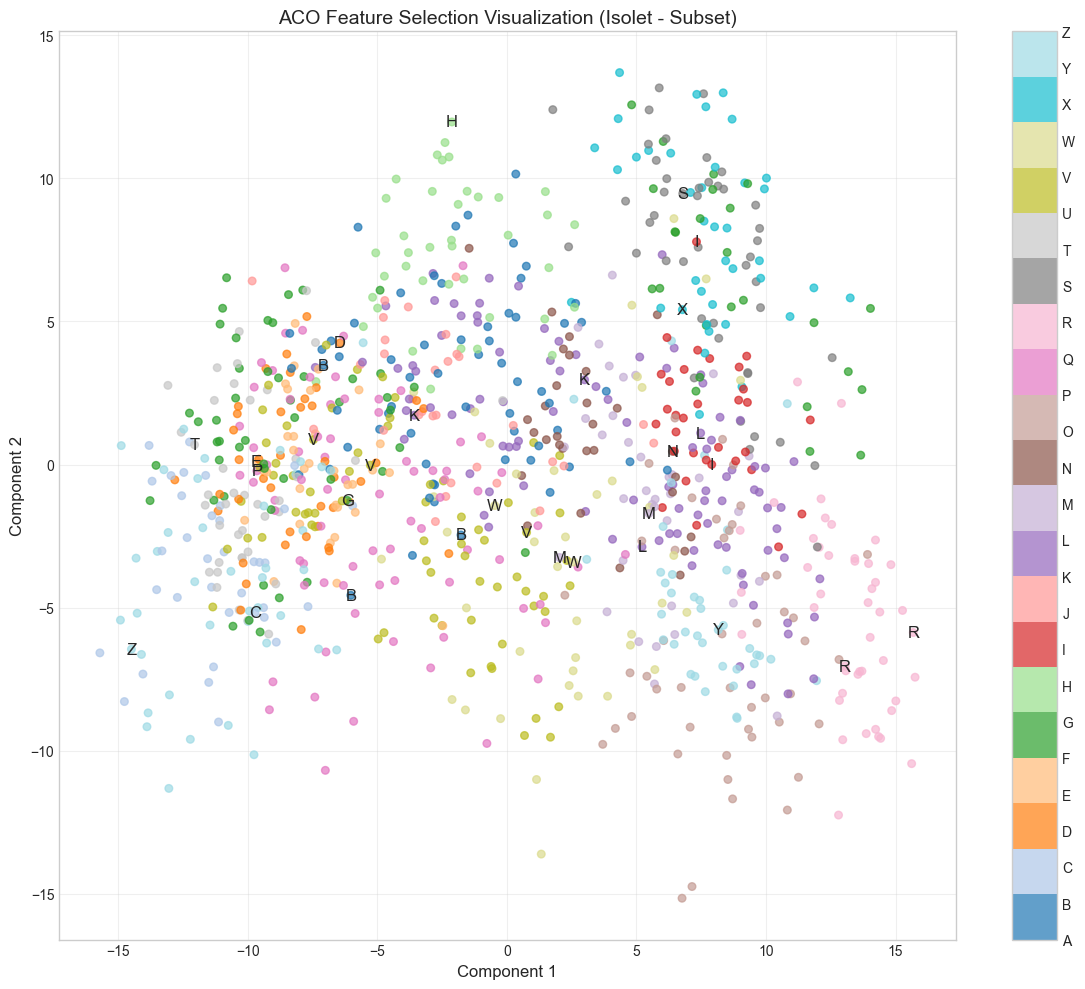

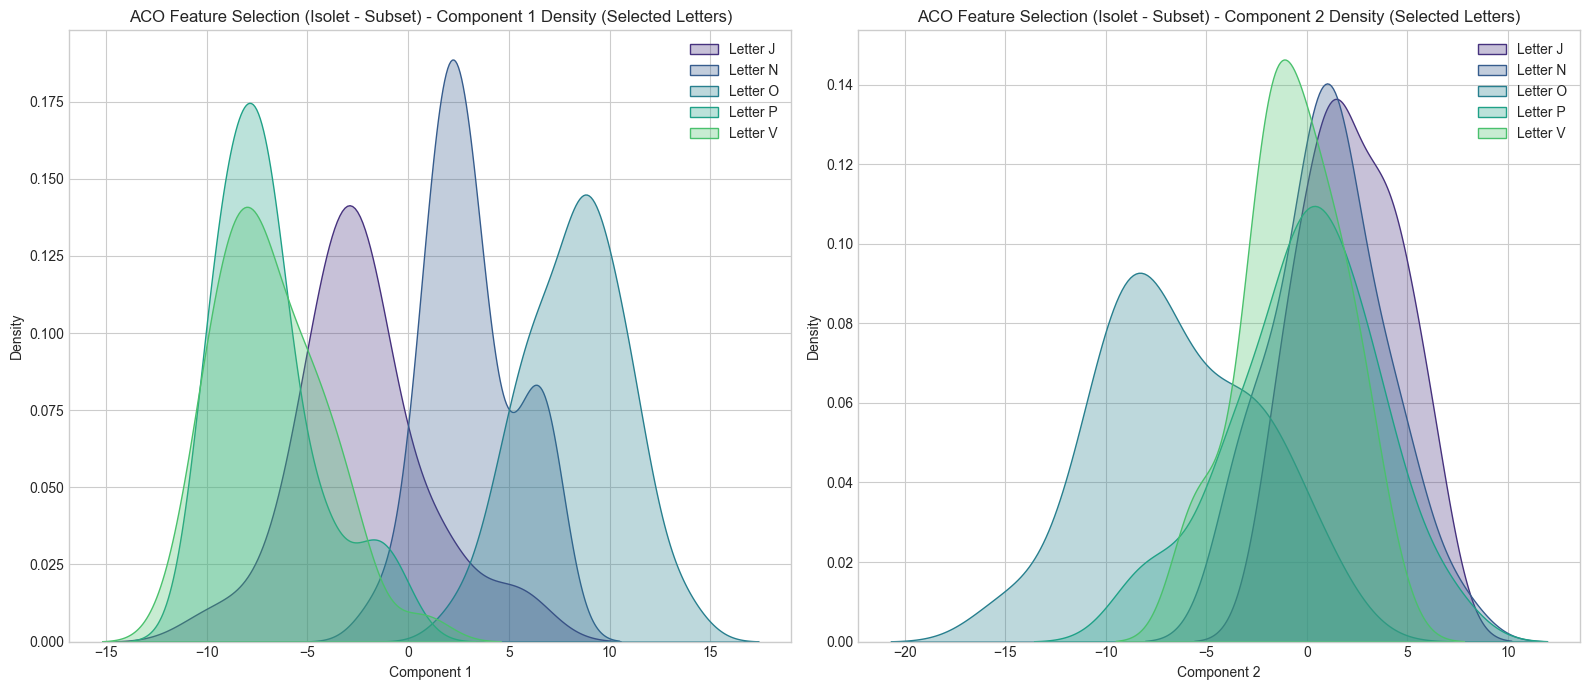

In [21]:
sample_size = 1000  # Using a subset of samples
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_aco_subset = X[indices]
y_aco_subset = y[indices]

X_aco = dr.aco_feature_selection(X_aco_subset, y_aco_subset, n_ants=15, n_iterations=15, alpha=1, beta=2, rho=0.1)

# Evaluate ACO on the subset
trust_aco = metrics.trustworthiness(X_aco_subset, X_aco)
cont_aco = metrics.continuity(X_aco_subset, X_aco)
knn_acc_aco = metrics.knn_accuracy(X_aco, y_aco_subset)
sil_score_aco = metrics.silhouette_score(X_aco, y_aco_subset)

print(f"ACO Metrics (on {sample_size}-sample subset):")
print(f"Trustworthiness: {trust_aco:.4f}")
print(f"Continuity: {cont_aco:.4f}")
print(f"KNN Accuracy: {knn_acc_aco:.4f}")
print(f"Silhouette Score: {sil_score_aco:.4f}")

# Visualize ACO results
visualize_letters(X_aco, y_aco_subset, "ACO Feature Selection Visualization (Isolet - Subset)")

# Plot density distribution
plot_density_distribution(X_aco, y_aco_subset, "ACO Feature Selection (Isolet - Subset)", n_classes_to_show=5)


PSO Metrics (on 1000-sample subset):
Trustworthiness: 0.6497
Continuity: 0.7688
KNN Accuracy: 0.1950
Silhouette Score: -0.1928


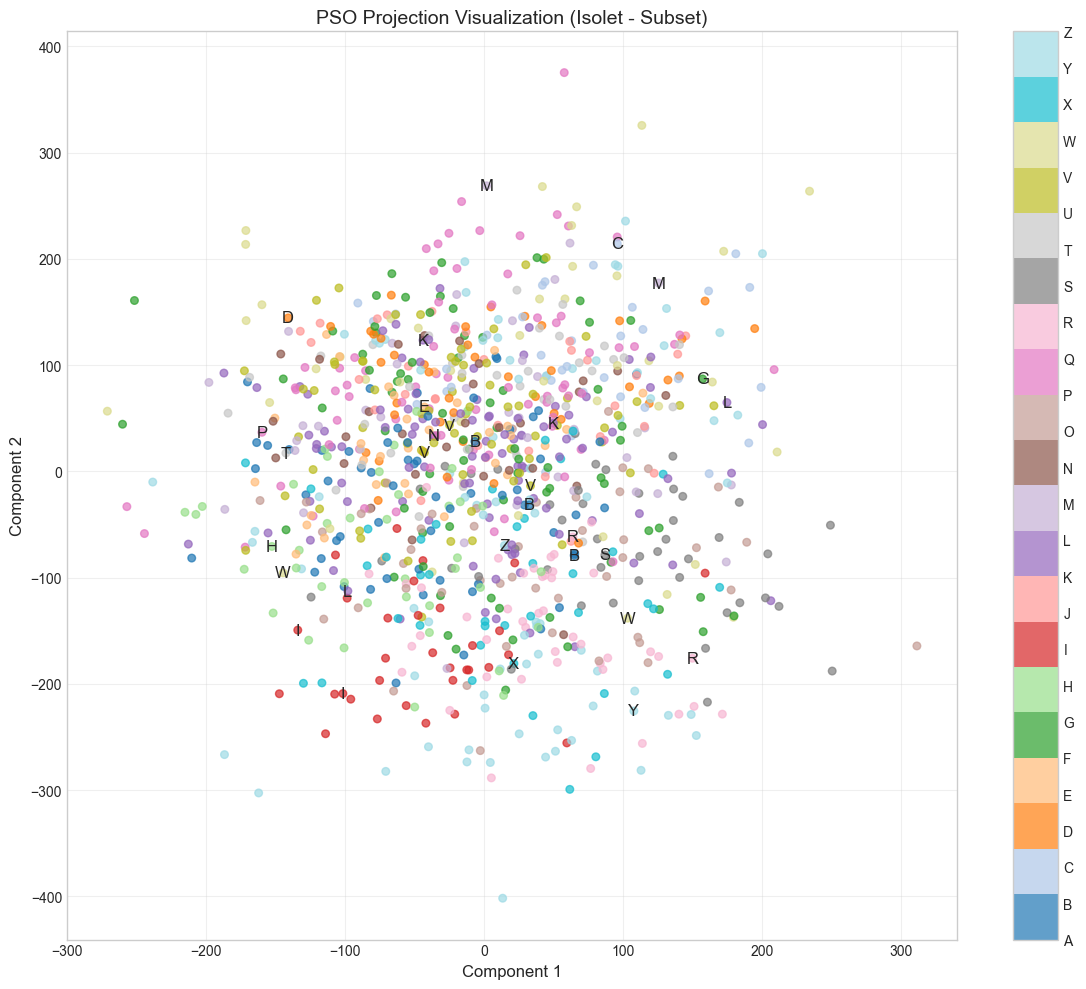

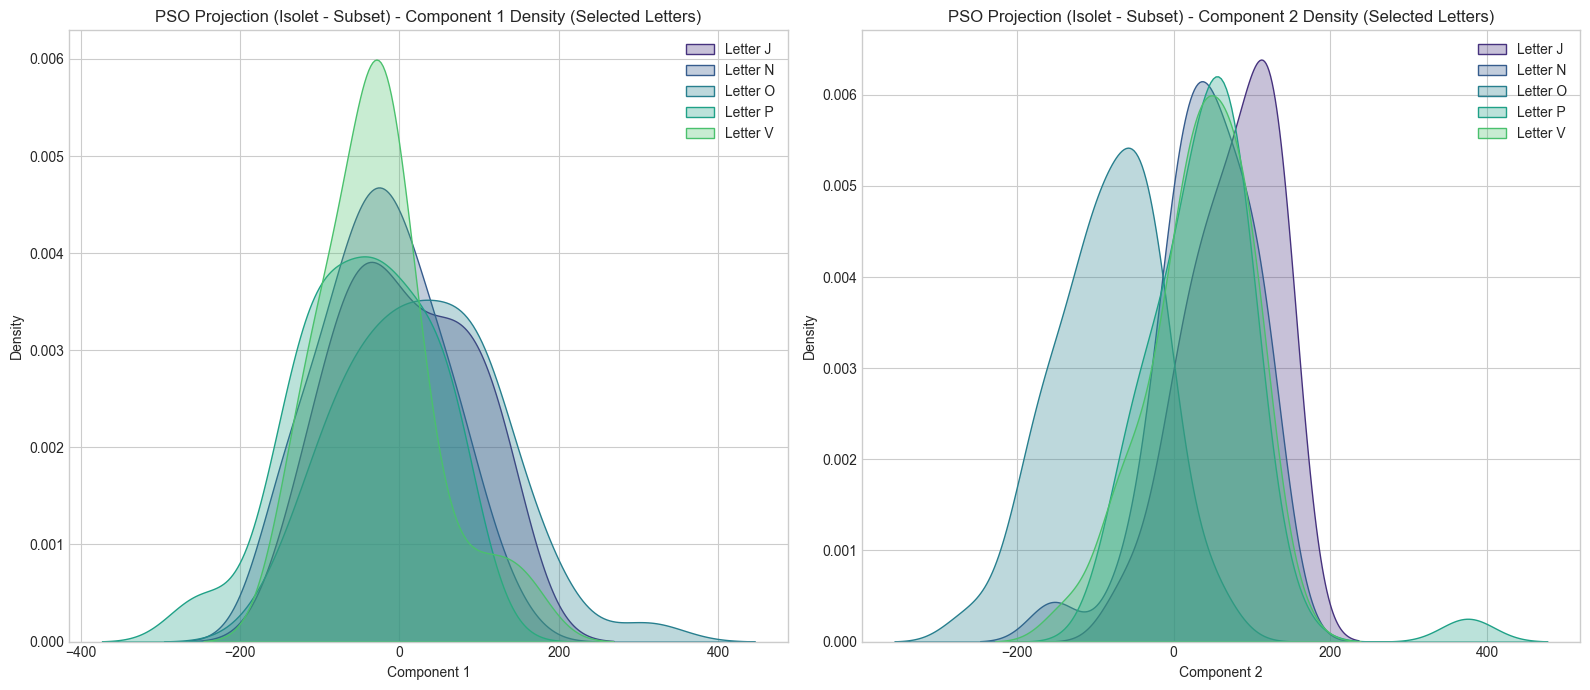

In [22]:
sample_size = 1000  # Using a subset of samples
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_pso_subset = X[indices]
y_pso_subset = y[indices]

X_pso = dr.pso_projection(X_pso_subset, y_pso_subset, n_particles=15, n_iterations=15, w=0.7, c1=1.5, c2=1.5)

# Evaluate PSO on the subset
trust_pso = metrics.trustworthiness(X_pso_subset, X_pso)
cont_pso = metrics.continuity(X_pso_subset, X_pso)
knn_acc_pso = metrics.knn_accuracy(X_pso, y_pso_subset)
sil_score_pso = metrics.silhouette_score(X_pso, y_pso_subset)

print(f"PSO Metrics (on {sample_size}-sample subset):")
print(f"Trustworthiness: {trust_pso:.4f}")
print(f"Continuity: {cont_pso:.4f}")
print(f"KNN Accuracy: {knn_acc_pso:.4f}")
print(f"Silhouette Score: {sil_score_pso:.4f}")

# Visualize PSO results
visualize_letters(X_pso, y_pso_subset, "PSO Projection Visualization (Isolet - Subset)")

# Plot density distribution
plot_density_distribution(X_pso, y_pso_subset, "PSO Projection (Isolet - Subset)", n_classes_to_show=5)

In [25]:
techniques = ['PCA', 'LDA', 't-SNE', 'MDS*', 'Isomap*', 'ICA', 'SOM', 'GA-PCA*', 'ABC*', 'ACO*', 'PSO*']
trustworthiness = [trust_pca, trust_lda, trust_tsne, trust_mds, trust_isomap, trust_ica, 
                  trust_som, trust_ga_pca, trust_abc, trust_aco, trust_pso]
continuity = [cont_pca, cont_lda, cont_tsne, cont_mds, cont_isomap, cont_ica, 
             cont_som, cont_ga_pca, cont_abc, cont_aco, cont_pso]
knn_accuracy = [knn_acc_pca, knn_acc_lda, knn_acc_tsne, knn_acc_mds, knn_acc_isomap, knn_acc_ica, 
               knn_acc_som, knn_acc_ga_pca, knn_acc_abc, knn_acc_aco, knn_acc_pso]
silhouette = [sil_score_pca, sil_score_lda, sil_score_tsne, sil_score_mds, sil_score_isomap, sil_score_ica, 
             sil_score_som, sil_score_ga_pca, sil_score_abc, sil_score_aco, sil_score_pso]

# Create a DataFrame
results_df = pd.DataFrame({
    'Technique': techniques,
    'Trustworthiness': trustworthiness,
    'Continuity': continuity,
    'KNN Accuracy': knn_accuracy,
    'Silhouette Score': silhouette
})

# Display the results
print("Note: Techniques marked with * were applied on a reduced subset of 1000 samples due to computational constraints.")
results_df

Note: Techniques marked with * were applied on a reduced subset of 1000 samples due to computational constraints.


Technique  Trustworthiness  Continuity  KNN Accuracy  Silhouette Score
0        PCA         0.843781    0.956313      0.255128         -0.094573
1        LDA         0.835723    0.939775      0.512179          0.052797
2      t-SNE         0.994496    0.988695      0.818590          0.181725
3       MDS*         0.858462    0.884287      0.335000         -0.114250
4    Isomap*         0.889525    0.950616      0.440000         -0.035659
5        ICA         0.844177    0.950632      0.262821         -0.099916
6        SOM         0.949844    0.890402      0.607051         -0.062195
7    GA-PCA*         0.847383    0.934106      0.285000         -0.115859
8       ABC*         0.715886    0.821254      0.185000         -0.188289
9       ACO*         0.850839    0.933815      0.410000         -0.112657
10      PSO*         0.649670    0.768772      0.195000         -0.192840

C:\Users\LapTop\AppData\Local\Temp\ipykernel_13632\456934017.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_13632\456934017.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_13632\456934017.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\LapTop\AppData\Local\Temp\ipykernel_13632\456934017.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickla

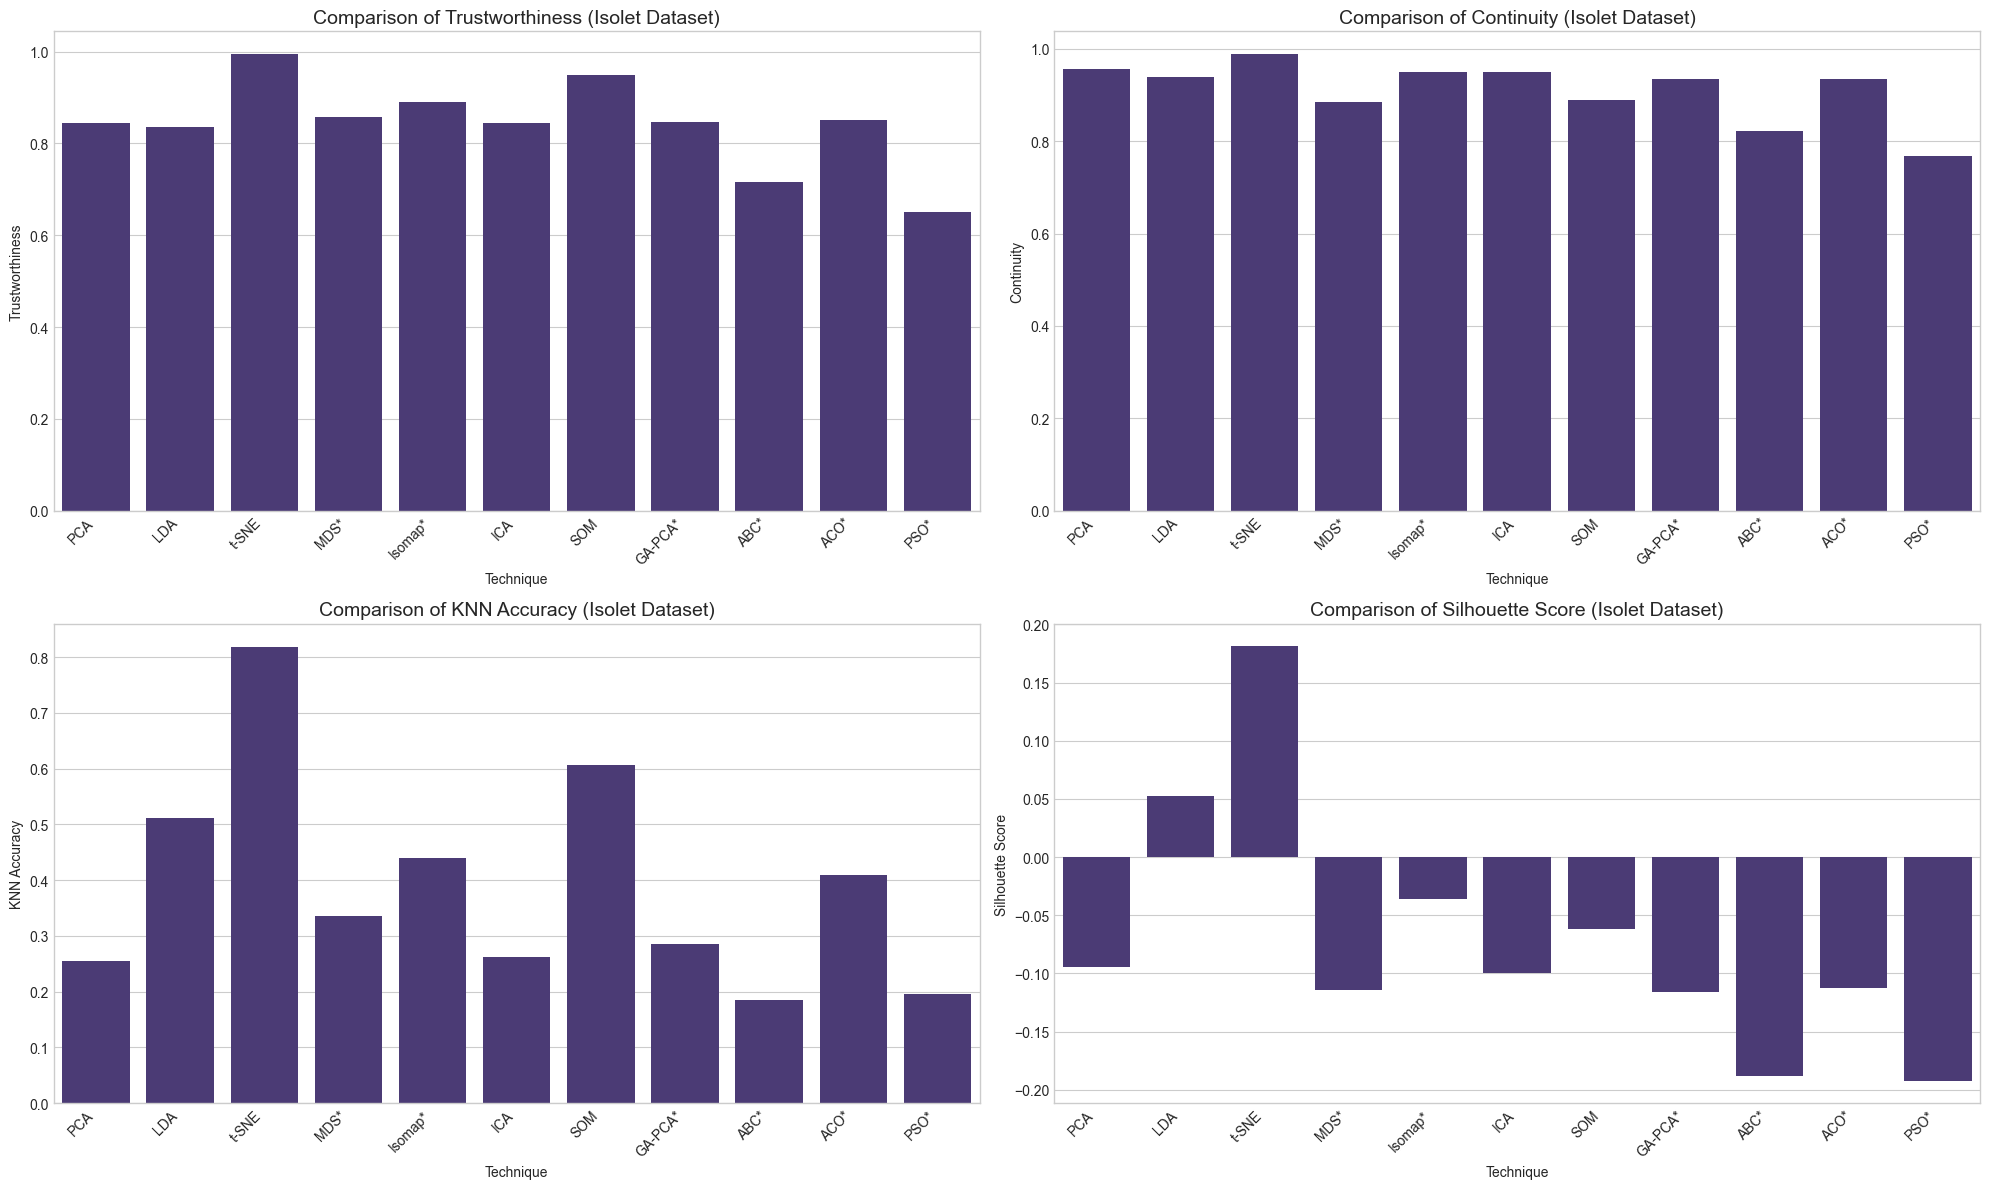

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
metrics_to_plot = ['Trustworthiness', 'Continuity', 'KNN Accuracy', 'Silhouette Score']

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    sns.barplot(x='Technique', y=metric, data=results_df, ax=ax)
    ax.set_title(f'Comparison of {metric} (Isolet Dataset)', fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.tight_layout()
plt.show()


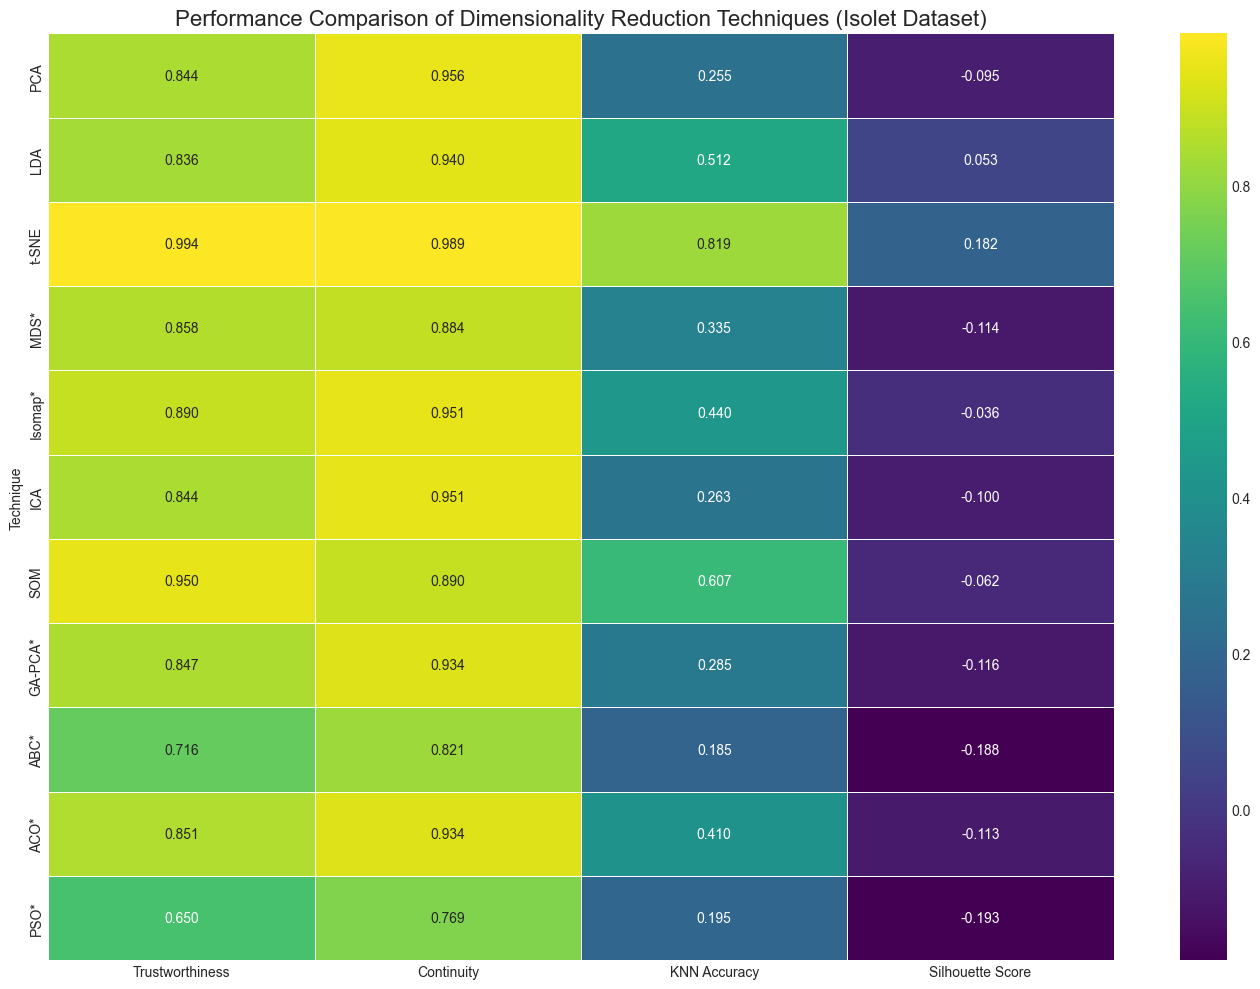

In [28]:
plt.figure(figsize=(14, 10))
metrics_heatmap = results_df.set_index('Technique')
sns.heatmap(metrics_heatmap, annot=True, cmap='viridis', fmt='.3f', linewidths=0.5)
plt.title('Performance Comparison of Dimensionality Reduction Techniques (Isolet Dataset)', fontsize=16)
plt.tight_layout()
plt.show()

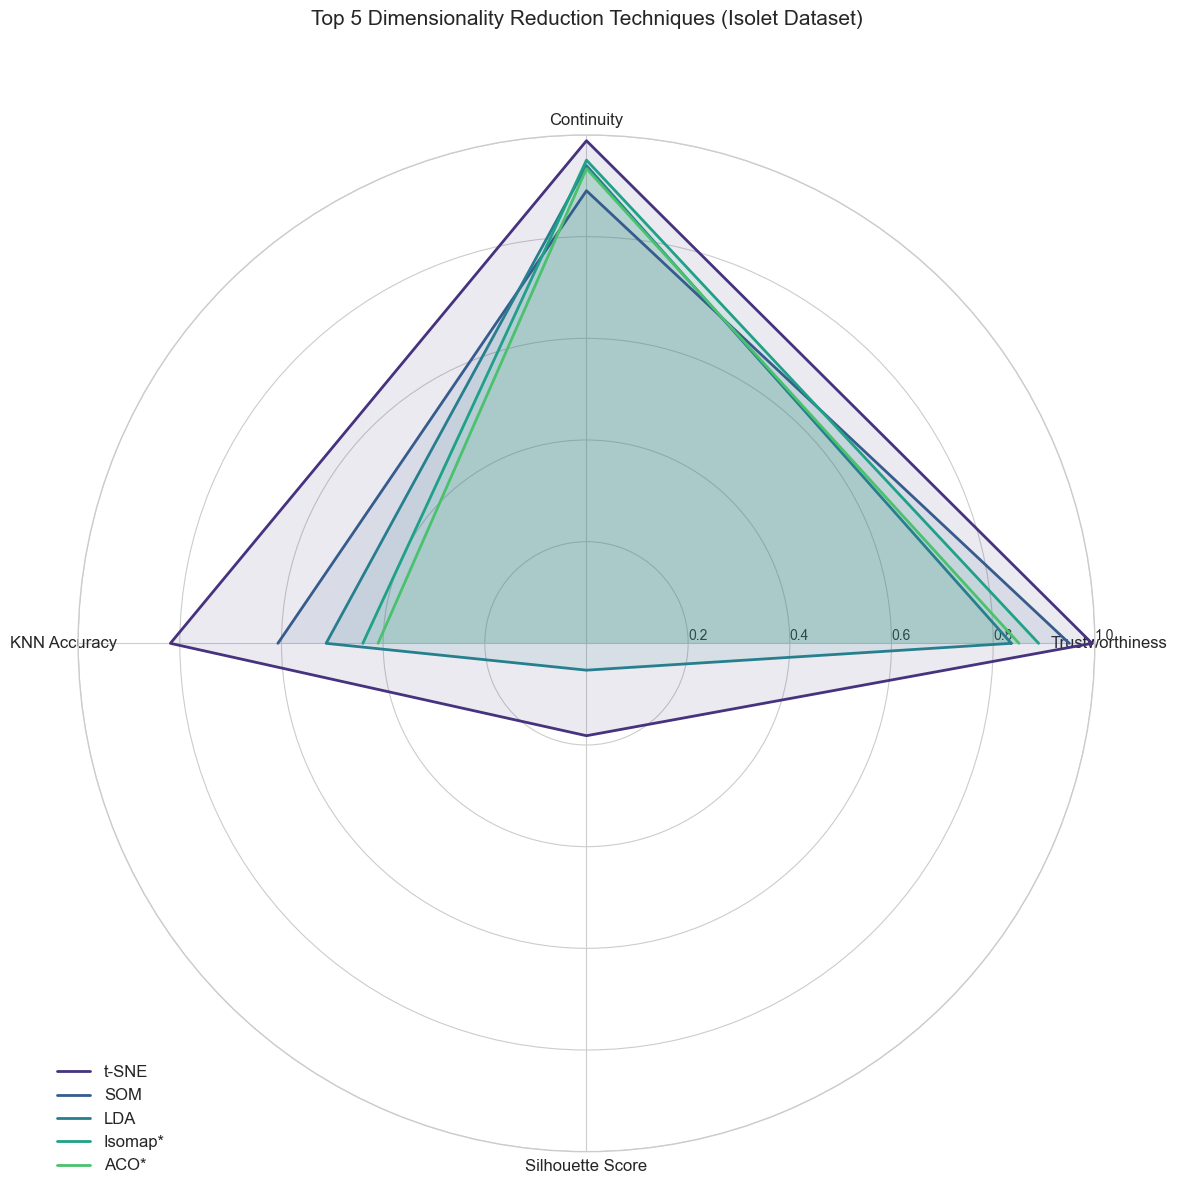

In [29]:
from math import pi

# Select top 5 techniques based on average metrics
metrics_heatmap['Average'] = metrics_heatmap.mean(axis=1)
top_5 = metrics_heatmap.nlargest(5, 'Average').drop('Average', axis=1)

# Prepare data for radar chart
categories = list(top_5.columns)
N = len(categories)

# Create angles for radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Create figure
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# Add each technique as a line on the radar chart
for technique, values in top_5.iterrows():
    values_list = values.tolist()
    values_list += values_list[:1]  # Close the loop
    ax.plot(angles, values_list, linewidth=2, label=technique)
    ax.fill(angles, values_list, alpha=0.1)

# Set the labels and styling
plt.xticks(angles[:-1], categories, fontsize=12)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=10)
plt.ylim(0, 1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
plt.title('Top 5 Dimensionality Reduction Techniques (Isolet Dataset)', fontsize=15, y=1.1)
plt.tight_layout()
plt.show()